In [350]:
%matplotlib inline


import scipy as sp
import scipy.stats as stats


plt.style.use('ggplot')

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
clinical_df = pd.read_csv('MGH_OLINK_COVID_Oct_12_2020/MGH_COVID_Clinical_Info.txt',delimiter=';')
npx_df = pd.read_csv('MGH_OLINK_COVID_Oct_12_2020/MGH_COVID_OLINK_NPX.txt',delimiter=';')

In [26]:
clinical_df.head(10)

,subject_id,COVID,Age cat,BMI cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,crp_3_cat,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat
0,1,1,1,4,0,0,0,0,0,0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2,2,0,0,0,0,0,0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,3,4,0,1,0,0,0,0,...,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2,0,0,0,0,0,0,...,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,3,3,0,0,0,1,1,0,...,5.0,3.0,NaN,3.0,5.0,3.0,1.0,4.0,4.0,3.0
5,6,1,1,1,1,0,0,0,0,0,...,4.0,3.0,5.0,3.0,3.0,2.0,1.0,4.0,5.0,5.0
6,7,1,2,2,0,0,0,1,0,0,...,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0,4,3,0,0,0,1,1,1,...,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,1,5,2,0,1,1,0,1,0,...,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0,2,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
npx_df = npx_df[(npx_df['Timepoint'] == 'D0') | (npx_df['Timepoint'] == 'D7')|(npx_df['Timepoint'] == 'D3')]

'''
Now, we will drop the DE and D7.1 rows in npx_df since these rows are just not useful for EDA 
'''
npx_df.drop(npx_df[npx_df['Timepoint'] == 'D7.1'].index,inplace = True)
npx_df.drop(npx_df[npx_df['Timepoint'] == 'DE'].index,inplace = True)
npx_df.drop(npx_df[npx_df['Timepoint'] == 'DE.2'].index,inplace = True)

In [28]:
#check number of unique bio markers per panel
for each in npx_df['Panel'].unique():
    k = npx_df[npx_df['Panel'] == each]
    print(each,'panel has: ' ,k['Assay'].unique().shape)

ONCOLOGY panel has:  (368,)
NEUROLOGY panel has:  (328,)
CARDIOMETABOLIC panel has:  (368,)
INFLAMMATION panel has:  (365,)


In [29]:
368+328+368+365

1429

In [30]:
#check number of unique bio marker per patient
k = npx_df[(npx_df['subject_id'] == 1.0) & (npx_df['SampleID'] == '1_D0')]
k.shape

(1429, 14)

In [31]:
grouped_panel = npx_df.groupby('subject_id')

In [32]:
idgroup_1 = grouped_panel.get_group(1)
print(idgroup_1)

     SampleID  subject_id Timepoint  Index   OlinkID UniProt    Assay  \
0        1_D0         1.0        D0     56  OID21311  Q9BTE6   AARSD1   
1        1_D0         1.0        D0     56  OID20921  Q96IU4  ABHD14B   
2        1_D0         1.0        D0     56  OID21280  P00519     ABL1   
3        1_D0         1.0        D0     56  OID21269  P09110    ACAA1   
4        1_D0         1.0        D0     56  OID20159  P16112     ACAN   
...       ...         ...       ...    ...       ...     ...      ...   
2853     1_D3         1.0        D3     88  OID21508  O43895  XPNPEP2   
2854     1_D3         1.0        D3     88  OID21348  P07947     YES1   
2855     1_D3         1.0        D3     88  OID20478  Q7Z739   YTHDF3   
2856     1_D3         1.0        D3     88  OID21205  Q05516   ZBTB16   
2857     1_D3         1.0        D3     88  OID20082  Q13105   ZBTB17   

      MissingFreq            Panel  Panel_Version                     PlateID  \
0            0.04         ONCOLOGY        

In [33]:
filled_clinical_df = clinical_df.fillna(4567)
filled_clinical_df['Age cat'].unique()


array([1, 2, 3, 4, 5])

In [405]:
covid_table = filled_clinical_df[filled_clinical_df['COVID'] == 1]
Age_cat = covid_table.loc[:,['Age cat','WHO 0','WHO 3','WHO 7','WHO 28','WHO max']]
Age_count = Age_cat.groupby('Age cat')
Age_mean = Age_count.mean()
Age_mean
# x = Age_count['Age cat']
# fig,ax = plt.subplots(figsize = (5,5))
# # ax.bar(x,)
# # ax.set_title('Age category')
# Age_count.plot.bar(rot=0,stacked = True)


,WHO 0,WHO 3,WHO 7,WHO 28,WHO max
Age cat,,,,,
1,4.687500,4.750000,5.375000,5.750000,4.531250
2,4.015152,4.409091,4.909091,5.530303,4.000000
3,3.853933,4.056180,4.415730,5.157303,3.640449
4,3.292308,3.169231,3.553846,3.953846,2.738462
5,3.666667,3.444444,3.388889,3.518519,2.685185


In [411]:
heart_grp = covid_table.loc[:,['HEART','WHO 0','WHO 3','WHO 7','WHO 28']][covid_table['HEART'] ==1]
hg=heart_grp.groupby('HEART').mean()

lung_grp = covid_table.loc[:,['LUNG','WHO 0','WHO 3','WHO 7','WHO 28']][covid_table['LUNG'] ==1]
lg=lung_grp.groupby('LUNG').mean()

kidney_grp = covid_table.loc[:,['KIDNEY','WHO 0','WHO 3','WHO 7','WHO 28']][covid_table['KIDNEY'] ==1]
kg=kidney_grp.groupby('KIDNEY').mean()

diabetes_grp = covid_table.loc[:,['DIABETES','WHO 0','WHO 3','WHO 7','WHO 28']][covid_table['DIABETES'] ==1]
dg=diabetes_grp.groupby('DIABETES').mean()

htn_grp = covid_table.loc[:,['HTN','WHO 0','WHO 3','WHO 7','WHO 28']][covid_table['HTN'] ==1]
htg=htn_grp.groupby('HTN').mean()

immuno_grp = covid_table.loc[:,['IMMUNO','WHO 0','WHO 3','WHO 7','WHO 28']][covid_table['IMMUNO'] ==1]
ig=immuno_grp.groupby('IMMUNO').mean()



In [412]:
#disease_pd = pd.concat([hg,lg,kg,dg,htg,ig],keys=['HEART','LUNG','KIDNEY','DIABETES','HTN','IMMUNO'])
disease_pd = pd.concat([hg,lg,kg,dg,htg,ig]).reset_index()
disease_pd.drop(columns = ['index'],inplace =True)
disease_pd

,WHO 0,WHO 3,WHO 7,WHO 28
0,3.666667,3.541667,3.708333,4.062500
1,4.030303,4.090909,4.621212,5.060606
2,3.365854,3.097561,3.268293,3.439024
3,3.486486,3.495495,3.819820,4.387387
4,3.698630,3.609589,3.828767,4.219178
5,3.440000,3.200000,3.480000,3.880000


(2.0, 5.5)

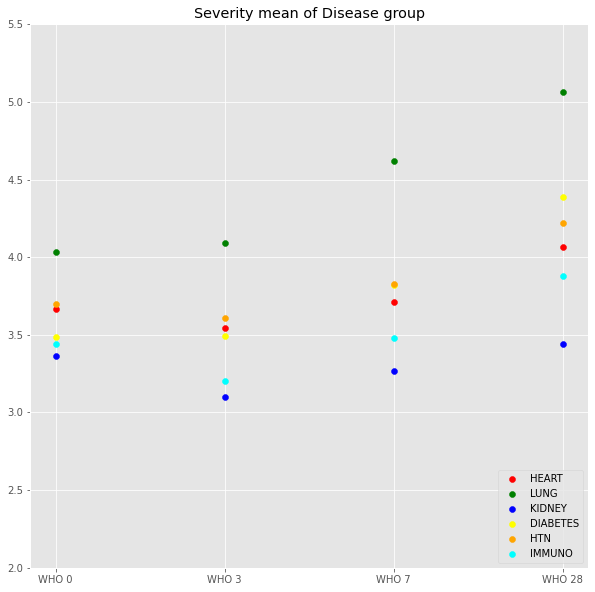

In [413]:
fig,axs = plt.subplots(figsize = (10,10))
color_dict = {0:"red",1:"green",2:"blue",3:"yellow",4:"orange",5:'cyan'}
disease_dict = {0:"HEART",1:"LUNG",2:"KIDNEY",3:"DIABETES",4:"HTN",5:'IMMUNO'}
for i in list(disease_pd.index):
    y= disease_pd.iloc[i,:].values
    x= disease_pd.columns 
    cl = color_dict[i]
    axs.scatter(x,y,c= cl,label = '{}'.format(disease_dict[i]))

# str = 'age: {}'.format(age_dict[i+1])
axs.set_title('Severity mean of Disease group')
plt.legend(loc='lower right')
axs.set_ylim(2,5.5)
#fig.tight_layout()

In [392]:
# print(heart_grp.count())
# print(lung_grp.count())
#kidney_grp.loc[(kidney_grp['WHO max'] <= 2]),'WHO max'] = 1
kidney_grp = covid_table.loc[:,['Age cat','KIDNEY','WHO 0','WHO 3','WHO 7','WHO 28','WHO max']][covid_table['KIDNEY'] ==1]
kg=kidney_grp.groupby('KIDNEY').mean()
print('kidney samples: ',kidney_grp.count())
kidney_grp['WHO max'] = np.where((kidney_grp['WHO max'] <= 2),1,kidney_grp['WHO max'])
kidney_grp['WHO max'] = np.where((kidney_grp['WHO max'] > 1 ),0,kidney_grp['WHO max'])
print('Kidney severity P: ',kidney_grp['WHO max'].sum())

lung_grp = covid_table.loc[:,['LUNG','WHO 0','WHO 3','WHO 7','WHO 28','WHO max']][covid_table['LUNG'] ==1]
print('lung samples: ',lung_grp.count())
lung_grp['WHO max'] = np.where((lung_grp['WHO max'] <= 2),1,lung_grp['WHO max'])
lung_grp['WHO max'] = np.where((lung_grp['WHO max'] > 1 ),0,lung_grp['WHO max'])
print('lung severity P: ',lung_grp['WHO max'].sum())

immuno_grp = covid_table.loc[:,['IMMUNO','WHO 0','WHO 3','WHO 7','WHO 28','WHO max']][covid_table['IMMUNO'] ==1]
print('IMMUNO samples: ',immuno_grp.count())
immuno_grp['WHO max'] = np.where((immuno_grp['WHO max'] <= 2),1,immuno_grp['WHO max'])
immuno_grp['WHO max'] = np.where((immuno_grp['WHO max'] > 1 ),0,immuno_grp['WHO max'])
print('immuno severity P: ',immuno_grp['WHO max'].sum())

#print(kidney_grp.groupby('WHO max').count())
# print(diabetes_grp.count())
# print(htn_grp.count())
#age_dict = {1:'20-34',2:'36-49',3:'50-64',4:'65-79',5:'80+'}
#(immuno_grp.groupby('WHO max').count())


kidney samples:  Age cat    41
KIDNEY     41
WHO 0      41
WHO 3      41
WHO 7      41
WHO 28     41
WHO max    41
dtype: int64
Kidney severity P:  25
lung samples:  LUNG       66
WHO 0      66
WHO 3      66
WHO 7      66
WHO 28     66
WHO max    66
dtype: int64
lung severity P:  16
IMMUNO samples:  IMMUNO     25
WHO 0      25
WHO 3      25
WHO 7      25
WHO 28     25
WHO max    25
dtype: int64
immuno severity P:  14


# Null Hypothesis and Hypothesis test

 LUNG VS KIDNEY

 
 My null hypothesis is that the frequency Lung disease case being severe  is *at most* the frequency that Kidney being severe.

In [381]:
shared_sample_freq = (16.0 + 25.0) / 107
shared_sample_variance = 107 * (shared_sample_freq * (1 - shared_sample_freq)) / 2706

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))
shared_sample_variance

0.009345794392523364

Text(0.5, 1.0, 'Distribution of Difference in Sample Frequencies Assuming $H_0$')

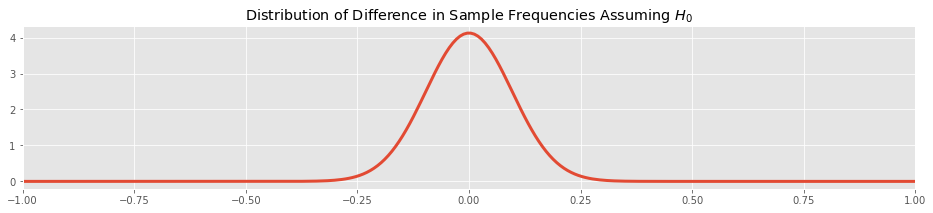

In [382]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")

The difference in proportions in the observed sample is

In [432]:
lung_sample_freq = 16.0 / 66
kidney_sample_freq = 25.0 / 41
difference_in_sample_proportions = kidney_sample_freq - lung_sample_freq
difference_in_proportions.cdf(difference_in_sample_proportions)
k=round(difference_in_proportions.cdf(difference_in_sample_proportions),10)
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))
print("Difference in sample proportions cdf: {:2.2f}".format(k))
round(difference_in_proportions.cdf(difference_in_sample_proportions),10)

Difference in sample proportions: 0.37
Difference in sample proportions cdf: 1.00


0.9999275673

In [421]:
p_value = 1 - difference_in_proportions.cdf(.21)
print("p-value for kickfip frequency comparison: {:2.2f}".format(p_value))

p-value for kickfip frequency comparison: 0.01


Text(0.5, 1.0, 'p-value Region')

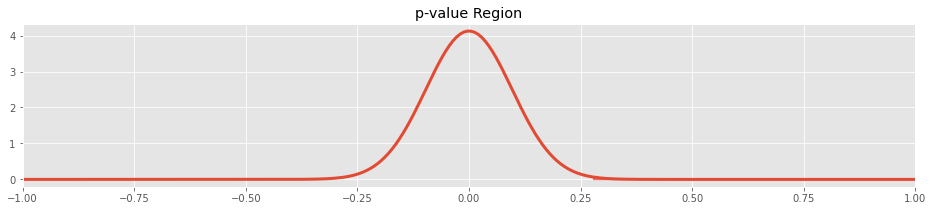

In [439]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= .27),
                color="red", alpha=0.5)
ax.set_xlim(-1, 1)
ax.set_title("p-value Region")

In [ ]:
 KIDNEY VS LUNG AND IMMUNO
 
 My null hypothesis is that the frequency Lung or immuno disease case being severe  is *at most* the frequency that Kidney being severe.

In [ ]:
shared_sample_freq = (16.0 + 25.0 + 14) / 132
shared_sample_variance = 107 * (shared_sample_freq * (1 - shared_sample_freq)) / 2706

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))
shared_sample_variance

In [436]:
kidney_grp = covid_table.loc[:,['Age cat','KIDNEY','WHO 0','WHO 3','WHO 7','WHO 28','WHO max']][covid_table['KIDNEY'] ==1]
kidney_origin_array = list(kidney_grp['WHO max'])
kidney_grp['WHO max'] = np.where((kidney_grp['WHO max'] <= 2),1,kidney_grp['WHO max'])
kidney_grp['WHO max'] = np.where((kidney_grp['WHO max'] > 1 ),0,kidney_grp['WHO max'])
kidney_array=list(kidney_grp['WHO max'])


lung_grp = covid_table.loc[:,['Age cat','KIDNEY','WHO 0','WHO 3','WHO 7','WHO 28','WHO max']][covid_table['LUNG'] ==1]
lung_origin_array = list(lung_grp['WHO max'])
lung_grp['WHO max'] = np.where((lung_grp['WHO max'] <= 2),1,lung_grp['WHO max'])
lung_grp['WHO max'] = np.where((lung_grp['WHO max'] > 1 ),0,lung_grp['WHO max'])
lung_array=list(lung_grp['WHO max'])

immuno_grp = covid_table.loc[:,['IMMUNO','WHO 0','WHO 3','WHO 7','WHO 28','WHO max']][covid_table['IMMUNO'] ==1]
immuno_origin_array = list(immuno_grp['WHO max'])
immuno_grp['WHO max'] = np.where((immuno_grp['WHO max'] <= 2),1,immuno_grp['WHO max'])
immuno_grp['WHO max'] = np.where((immuno_grp['WHO max'] > 1 ),0,immuno_grp['WHO max'])
immuno_array
# print('IMMUNO samples: ',immuno_grp.count())

# print('immuno severity P: ',immuno_grp['WHO max'].sum())

[2, 1, 4, 4, 2, 6, 1, 4, 1, 5, 4, 5, 4, 2, 2, 4, 6, 1, 2, 1, 2, 2, 2, 2, 4]

In [394]:
matt_heights = [1.5, 0.9, 0.9, 1.3, 2.1, 1.9, 1.6, 1.4, 2.3, 1.0, 1.5, 0.9, 2.1,
                1.3, 1.4, 2.1, 1.2, 1.7, 1.7, 2.0, 1.6, 1.2, 1.6, 1.7, 1.5]
nick_heights = [1.9, 1.8, 1.3, 2.3, 1.7, 1.9, 2.7, 2.1, 2.2, 1.5, 1.8, 2.0, 1.1,
                1.7, 2.1, 1.5, 2.3, 1.5, 2.0, 2.4, 1.5, 1.4, 1.6, 1.8, 1.0]

In [440]:
stats.ttest_ind(kidney_array,immuno_array,equal_var = False)

Ttest_indResult(statistic=-6.997029322487309, pvalue=1.6734762568284695e-07)

In [433]:
14/25

0.56

In [434]:
25/41

0.6097560975609756

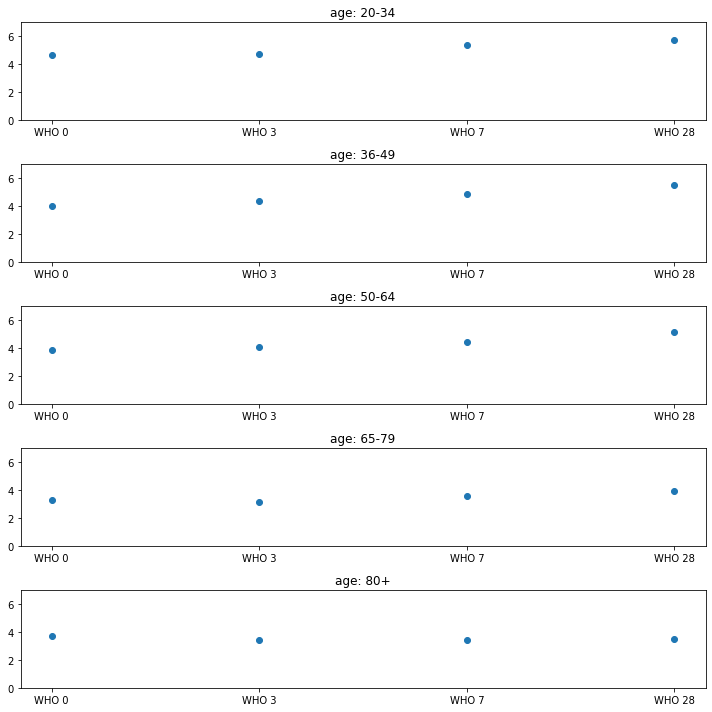

In [49]:
age_dict = {1:'20-34',2:'36-49',3:'50-64',4:'65-79',5:'80+'}
fig,axs = plt.subplots(5,1,figsize = (10,10))
for i,ax in enumerate(axs):
    y= Age_mean.iloc[i,:].values
    x= Age_mean.columns 
    axs[i].scatter(x,y)
    str = 'age: {}'.format(age_dict[i+1])
    axs[i].set_title(str)
    axs[i].set_ylim(0,7)
fig.tight_layout()

(2.0, 6.0)

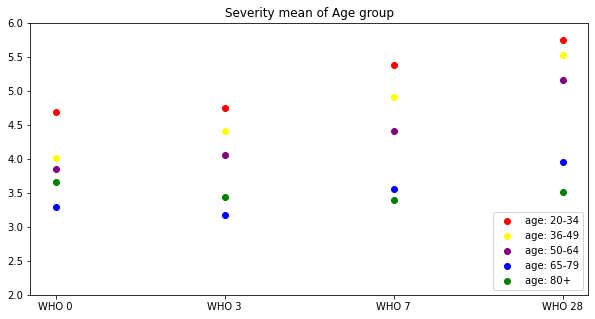

In [37]:
fig,axs = plt.subplots(figsize = (10,5))
color_dict = {1:"red",2:"yellow",3:"purple",4:"blue",5:"green"}
print()
for i in list(Age_mean.index):
    y= Age_mean.iloc[i-1,:].values
    x= Age_mean.columns 
    cl = color_dict[i]
    axs.scatter(x,y,c= cl,label = 'age: {}'.format(age_dict[i]))


# str = 'age: {}'.format(age_dict[i+1])
axs.set_title('Severity mean of Age group')
plt.legend(loc='lower right')
axs.set_ylim(2,6)
#fig.tight_layout()

In [38]:
by_age = covid_table.loc[:,['subject_id','COVID','Age cat','WHO 0','WHO 3','WHO 7']].groupby('Age cat')
by_age.get_group(1)
# for each in filled_clinical_df['Age cat'].unique():
#     k = by_age.get_group(each)[by_age.get_group(each)['WHO 0'] == 4]

,subject_id,COVID,Age cat,WHO 0,WHO 3,WHO 7
0,1,1,1,4,5,6
3,4,1,1,4,4,6
5,6,1,1,4,4,4
23,24,1,1,4,4,6
25,26,1,1,6,6,6
30,31,1,1,6,6,6
38,39,1,1,2,2,2
46,47,1,1,6,6,6
49,50,1,1,4,4,5
72,73,1,1,6,6,6


In [ ]:
'''
severity index
'''

In [227]:
'''
severity of COVID-Heart on WHO 0
'''
heart_grp = covid_table[covid_table['HEART'] == 1]
grouped_h = heart_grp.groupby('WHO 0')
grouped_h['COVID'].sum()


WHO 0
2    12
4    29
5     6
6     1
Name: COVID, dtype: int64

In [228]:
'''
severity of COVID-Lung on WHO 0
'''
lung_grp = covid_table[covid_table['LUNG'] == 1]
grouped_l = lung_grp.groupby('WHO 0')
grouped_l['COVID'].sum()


WHO 0
2     9
4    41
5    12
6     4
Name: COVID, dtype: int64

In [39]:
'''
condition A is the grp with highest risk : where 
    COVID
       +
    WHO 0 =1
OR  WHO 3 =1
OR  WHO 7 =1
       +
    HEART
    HTN
    DIABETES
'''
conditionA_df =  filled_clinical_df[(filled_clinical_df['COVID'] == 1) & ((filled_clinical_df['WHO 0'] == 1) | (filled_clinical_df['WHO 3'] == 1) | (filled_clinical_df['WHO 7'] == 1)) & (filled_clinical_df['HEART'] == 1) & (filled_clinical_df['HTN'] == 1) & (filled_clinical_df['DIABETES'] == 1)]

In [40]:

# NO Covid+Lung Group

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Version,PlateID,QC_Warning,LOD,NPX
1008873,6_D7,6.0,D7,8,OID20082,Q13105,ZBTB17,0.06,CARDIOMETABOLIC,1,20200772_Plate4_CAR_INF,Pass,0.5020,2.2121
1006023,6_D3,6.0,D3,11,OID20314,P13686,ACP5,0.03,CARDIOMETABOLIC,1,20200772_Plate4_CAR_INF,Pass,0.0783,4.1310
1006022,6_D3,6.0,D3,11,OID20124,Q15067,ACOX1,0.98,CARDIOMETABOLIC,1,20200772_Plate4_CAR_INF,Pass,0.9035,0.5693
1006021,6_D3,6.0,D3,11,OID20105,Q9BYF1,ACE2,0.14,CARDIOMETABOLIC,1,20200772_Plate4_CAR_INF,Pass,0.7389,1.6484
1006020,6_D3,6.0,D3,11,OID20159,P16112,ACAN,0.04,CARDIOMETABOLIC,1,20200772_Plate4_CAR_INF,Pass,1.1623,3.1466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923127,384_D0,384.0,D0,3,OID21398,P47992,XCL1,0.04,ONCOLOGY,1,20200772_Plate7_NEU_ONC,Pass,-0.1154,1.9838
923126,384_D0,384.0,D0,3,OID20926,O00308,WWP2,0.03,NEUROLOGY,1,20200772_Plate7_NEU_ONC,Pass,0.7482,4.0517
923125,384_D0,384.0,D0,3,OID20460,O14904,WNT9A,0.40,INFLAMMATION,1,20200772_plate7_CARDIO_INF,Pass,0.4360,0.7943
923140,384_D7,384.0,D7,75,OID20124,Q15067,ACOX1,0.98,CARDIOMETABOLIC,1,20200772_plate7_CARDIO_INF,Pass,0.9035,-0.2236


,Timepoint,Assay,NPX
0,D0,AARSD1,4.138273
1,D0,ABL1,3.201590
2,D0,ACAA1,3.436538
3,D0,ACP6,3.937785
4,D0,ADAMTS15,4.111373
...,...,...,...
1099,D7,WISP1,4.435889
1100,D7,XCL1,3.264184
1101,D7,XPNPEP2,2.244679
1102,D7,YES1,4.200663


,Timepoint,Assay,NPX
0,D0,ACAN,2.586240
1,D0,ACE2,1.589727
2,D0,ACOX1,0.099913
3,D0,ACP5,4.061560
4,D0,ACTA2,0.686292
...,...,...,...
1099,D7,VSTM2L,0.114553
1100,D7,VWF,6.012626
1101,D7,WASF1,1.102153
1102,D7,XG,2.452316


,Timepoint,Assay,NPX
0,D0,ACTN4,0.028692
1,D0,ADA,5.699869
2,D0,ADAM23,4.333644
3,D0,ADGRE2,5.509898
4,D0,AGER,5.717671
...,...,...,...
1090,D7,VEGFA,8.150342
1091,D7,VEGFD,6.290926
1092,D7,WFIKKN2,5.778058
1093,D7,WNT9A,0.876563


,Timepoint,Assay,NPX
0,D0,ABHD14B,2.292412
1,D0,ACVRL1,5.192796
2,D0,ADAM22,3.505642
3,D0,ADAM8,4.377931
4,D0,ADGRB3,4.984458
...,...,...,...
979,D7,VWC2,2.960274
980,D7,WARS,5.303332
981,D7,WFIKKN1,2.011268
982,D7,WISP2,5.622616



# NO Covid+Lung Group

In [45]:
'''
patients with lung disease and no covid
    no COVID
       +
  &  lung
'''
no_covid_lung_df =  filled_clinical_df[(filled_clinical_df['COVID'] == 0) & (filled_clinical_df['LUNG'] == 1)]
no_covid_lung_subid = no_covid_lung_df['subject_id']
'''
patients npx_df with lung disease and no_covid
'''
nc_lung_npx = npx_df[npx_df['subject_id'].isin(no_covid_lung_subid)]
nc_lung_npx.sort_values('subject_id',inplace = True)
nc_lung_npx

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Version,PlateID,QC_Warning,LOD,NPX
196130,16_D0,16.0,D0,2,OID20915,P15509,CSF2RA,0.03,NEUROLOGY,1,20200772_Plate5_NEURO_ONC,Pass,0.4484,1.9869
196730,16_D0,16.0,D0,2,OID21074,Q15818,NPTX1,0.04,NEUROLOGY,1,20200772_Plate5_NEURO_ONC,Pass,-0.0975,1.8576
196729,16_D0,16.0,D0,2,OID21235,Q9Y639,NPTN,0.88,ONCOLOGY,1,20200772_Plate5_NEURO_ONC,Pass,1.2749,0.5149
196728,16_D0,16.0,D0,2,OID20568,P23582,NPPC,0.05,INFLAMMATION,1,20200772_Plate5_CARDIO_INF,Pass,0.7402,4.1802
196727,16_D0,16.0,D0,2,OID20049,P16860,NPPB,0.55,CARDIOMETABOLIC,1,20200772_Plate5_CARDIO_INF,Pass,1.9691,1.8410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927893,386_D0,386.0,D0,30,OID20104,O75356,ENTPD5,0.04,CARDIOMETABOLIC,1,20200772_PLATE3_CARDIO_INF,Pass,0.3240,2.4589
927892,386_D0,386.0,D0,30,OID21260,Q9Y5L3,ENTPD2,0.28,ONCOLOGY,1,20200772_PLATE3_NEURO_ONC,Pass,-0.2017,1.3144
927891,386_D0,386.0,D0,30,OID20689,Q6UWV6,ENPP7,0.04,INFLAMMATION,1,20200772_PLATE3_CARDIO_INF,Pass,0.5992,4.1349
927911,386_D0,386.0,D0,30,OID20758,Q9NQ30,ESM1,0.03,INFLAMMATION,1,20200772_PLATE3_CARDIO_INF,Pass,0.8966,5.0079


In [63]:
'''
no Covid-Lung-Oncology df
'''
nc_l_onco = nc_lung_npx[nc_lung_npx['Panel'] =='ONCOLOGY']
nd_l_onco_mean = nc_l_onco.groupby(['Timepoint','Assay']).mean().reset_index()
nc_l_onco_stats = nd_l_onco_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_l_onco_stats.columns=['{}'.format(x[1]) for x in nc_l_onco_stats.columns]
nc_l_onco_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,2.523481,1.692086,-1.232748,1.142277,2.213866,3.824975,8.190318
D3,368.0,2.527560,1.695477,-1.365750,1.175912,2.261625,3.727850,7.655150


In [64]:
'''
no Covid-Lung-CARDIOMETABOLIC df
'''
nc_l_card = nc_lung_npx[nc_lung_npx['Panel'] =='CARDIOMETABOLIC']
nd_l_card_mean = nc_l_card.groupby(['Timepoint','Assay']).mean().reset_index()
nc_l_card_stats=nd_l_card_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_l_card_stats.columns=['{}'.format(x[1]) for x in nc_l_card_stats.columns]
nc_l_card_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,3.060747,1.759479,-0.26454,1.792194,2.854641,4.275415,8.31159
D3,368.0,2.964283,1.733628,-0.21455,1.620737,2.862300,4.053538,8.39390


In [65]:
'''
no Covid-Lung-INFLAMMATION df
'''
nc_l_infl = nc_lung_npx[nc_lung_npx['Panel'] =='INFLAMMATION']
nd_l_infl_mean = nc_l_infl.groupby(['Timepoint','Assay']).mean().reset_index()
nc_l_infl_stats = nd_l_infl_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_l_infl_stats.columns=['{}'.format(x[1]) for x in nc_l_infl_stats.columns]
nc_l_infl_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,365.0,3.121233,2.065279,-1.230802,1.345298,3.050713,4.675558,10.198378
D3,365.0,3.185009,2.091827,-1.152250,1.380750,3.290050,4.805950,10.567750


In [66]:
'''
no Covid-Lung-NEUROLOGY df
'''
nc_l_neur = nc_lung_npx[nc_lung_npx['Panel'] =='NEUROLOGY']
nd_l_neur_mean = nc_l_neur.groupby(['Timepoint','Assay']).mean().reset_index()
nc_l_neur_stats = nd_l_neur_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
#d_h_onco_mean = d_h_onco_mean.reset_index()
nc_l_neur_stats.columns=['{}'.format(x[1]) for x in nc_l_neur_stats.columns]
nc_l_neur_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,328.0,2.693245,1.610465,-0.56476,1.461169,2.731307,3.814858,7.018992
D3,328.0,2.721363,1.659772,-0.82490,1.454600,2.602325,3.876500,7.114850



# NO Covid+Diabetes Group

In [415]:
'''
patients with diabetes disease and no covid
    no COVID
       +
  &  Diabetes
'''
no_covid_diabetes_df =  filled_clinical_df[(filled_clinical_df['COVID'] == 0) & (filled_clinical_df['DIABETES'] == 1)]
no_covid_diabetes_subid = no_covid_diabetes_df['subject_id']
'''
patients npx_df with diabetes disease and no_covid
'''
nc_diabetes_npx = npx_df[npx_df['subject_id'].isin(no_covid_diabetes_subid)]
nc_diabetes_npx.sort_values('subject_id',inplace = True)
nc_diabetes_npx

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Version,PlateID,QC_Warning,LOD,NPX
1057816,8_D0,8.0,D0,3,OID20719,P09603,CSF1,0.04,INFLAMMATION,1,20200772_PLATE3_CARDIO_INF,Pass,0.3549,4.3355
1058417,8_D0,8.0,D0,3,OID21074,Q15818,NPTX1,0.04,NEUROLOGY,1,20200772_PLATE3_NEURO_ONC,Pass,-0.0975,2.2039
1058416,8_D0,8.0,D0,3,OID21235,Q9Y639,NPTN,0.88,ONCOLOGY,1,20200772_PLATE3_NEURO_ONC,Pass,1.2749,0.2244
1058415,8_D0,8.0,D0,3,OID20568,P23582,NPPC,0.05,INFLAMMATION,1,20200772_PLATE3_CARDIO_INF,Pass,0.7402,2.1200
1058414,8_D0,8.0,D0,3,OID20049,P16860,NPPB,0.55,CARDIOMETABOLIC,1,20200772_PLATE3_CARDIO_INF,Pass,1.9691,2.7257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910746,381_D0,381.0,D0,21,OID20100,O75354,ENTPD6,0.04,CARDIOMETABOLIC,1,20200772_plate1rerun_CARDIO_INF,Pass,0.2682,1.4591
910745,381_D0,381.0,D0,21,OID20104,O75356,ENTPD5,0.04,CARDIOMETABOLIC,1,20200772_plate1rerun_CARDIO_INF,Pass,0.3240,1.8830
910744,381_D0,381.0,D0,21,OID21260,Q9Y5L3,ENTPD2,0.28,ONCOLOGY,1,20200772_plate1rerun_NEURO_ONC,Pass,-0.2017,-0.3226
910764,381_D0,381.0,D0,21,OID21017,P15311,EZR,0.17,NEUROLOGY,1,20200772_Plate1_Plate8_NEU,Pass,0.1409,0.0244


In [416]:
'''
no Covid-Diabetes-Oncology df
'''
nc_d_onco = nc_diabetes_npx[nc_diabetes_npx['Panel'] =='ONCOLOGY']
nd_d_onco_mean = nc_d_onco.groupby(['Timepoint','Assay']).mean().reset_index()
nc_d_onco_stats = nd_d_onco_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_d_onco_stats.columns=['{}'.format(x[1]) for x in nc_d_onco_stats.columns]
nc_d_onco_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,2.566231,1.720064,-1.079157,1.191511,2.254175,3.897591,8.177936
D3,368.0,2.428041,1.710498,-1.380733,1.049983,2.151533,3.676175,7.753767


In [417]:
'''
no Covid-Diabetes-CARDIOMETABOLIC df
'''
nc_d_card = nc_diabetes_npx[nc_diabetes_npx['Panel'] =='CARDIOMETABOLIC']
nd_d_card_mean = nc_d_card.groupby(['Timepoint','Assay']).mean().reset_index()
nc_d_card_stats=nd_d_card_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_d_card_stats.columns=['{}'.format(x[1]) for x in nc_d_card_stats.columns]
nc_d_card_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,3.120360,1.793247,-0.407893,1.790152,2.922525,4.332209,8.232525
D3,368.0,2.977058,1.791623,-0.359833,1.508525,2.742183,4.142000,8.904367


In [418]:
'''
no Covid-Diabetes-INFLAMMATION df
'''
nc_d_infl = nc_diabetes_npx[nc_diabetes_npx['Panel'] =='INFLAMMATION']
nd_d_infl_mean = nc_d_infl.groupby(['Timepoint','Assay']).mean().reset_index()
nc_d_infl_stats = nd_d_infl_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_d_infl_stats.columns=['{}'.format(x[1]) for x in nc_d_infl_stats.columns]
nc_d_infl_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,365.0,3.189468,2.098928,-1.266464,1.332554,3.212318,4.853964,10.356264
D3,365.0,3.089567,2.097831,-1.272433,1.329867,3.084533,4.699533,10.539000


In [419]:
'''
no Covid-Lung-NEUROLOGY df
'''
nc_d_neur = nc_diabetes_npx[nc_diabetes_npx['Panel'] =='NEUROLOGY']
nd_d_neur_mean = nc_d_neur.groupby(['Timepoint','Assay']).mean().reset_index()
nc_d_neur_stats = nd_d_neur_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
#d_h_onco_mean = d_h_onco_mean.reset_index()
nc_d_neur_stats.columns=['{}'.format(x[1]) for x in nc_d_neur_stats.columns]
nc_d_neur_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,328.0,2.744840,1.643899,-0.561996,1.478682,2.812737,3.857185,7.110661
D3,328.0,2.647598,1.670277,-0.582633,1.355650,2.562583,3.816592,7.827700



# NO Covid+Kidney Group

In [151]:
'''
patient with kidney disease and no covid
    no COVID
       +
  &  kidney
'''
no_covid_kidney_df =  filled_clinical_df[(filled_clinical_df['COVID'] == 0) & (filled_clinical_df['KIDNEY'] == 1)]
no_covid_kidney_subid = no_covid_kidney_df['subject_id']
'''
patients npx_df with kidney disease and no covid
'''
nc_kidney_npx = npx_df[npx_df['subject_id'].isin(no_covid_kidney_subid)]
nc_kidney_npx.sort_values('subject_id',inplace = True)
nc_kidney_npx

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Version,PlateID,QC_Warning,LOD,NPX
351534,21_D0,21.0,D0,77,OID21311,Q9BTE6,AARSD1,0.04,ONCOLOGY,1,20200772_Plate8_NEU_ONC,Pass,0.7204,6.7239
352492,21_D0,21.0,D0,77,OID20191,O95502,NPTXR,0.04,CARDIOMETABOLIC,1,20200772_plate8_CARDIO_INF,Pass,0.3755,3.8053
352491,21_D0,21.0,D0,77,OID21074,Q15818,NPTX1,0.04,NEUROLOGY,1,20200772_Plate1_Plate8_NEU,Pass,-0.0975,2.5135
352490,21_D0,21.0,D0,77,OID21235,Q9Y639,NPTN,0.88,ONCOLOGY,1,20200772_Plate8_NEU_ONC,Pass,1.2749,2.1605
352489,21_D0,21.0,D0,77,OID20568,P23582,NPPC,0.05,INFLAMMATION,1,20200772_plate8_CARDIO_INF,Pass,0.7402,6.6759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762614,343_D0,343.0,D0,65,OID21074,Q15818,NPTX1,0.04,NEUROLOGY,1,20200772_Plate6_NEU_ONC,Pass,-0.0975,1.9975
762615,343_D0,343.0,D0,65,OID20191,O95502,NPTXR,0.04,CARDIOMETABOLIC,1,20200772_Plate6_CAR_INF,Pass,0.3755,3.4841
762616,343_D0,343.0,D0,65,OID21388,P01303,NPY,0.03,ONCOLOGY,1,20200772_Plate6_NEU_ONC,Pass,-0.6030,1.4509
762596,343_D0,343.0,D0,65,OID20470,Q12968,NFATC3,0.92,INFLAMMATION,1,20200772_Plate6_CAR_INF,Pass,0.1287,-0.6771


In [153]:
'''
no Covid-Kidney-Oncology df
'''
nc_k_onco = nc_kidney_npx[nc_kidney_npx['Panel'] =='ONCOLOGY']
nd_k_onco_mean = nc_k_onco.groupby(['Timepoint','Assay']).mean().reset_index()
nc_k_onco_stats = nd_k_onco_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_k_onco_stats.columns=['{}'.format(x[1]) for x in nc_k_onco_stats.columns]
nc_k_onco_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,2.804454,1.854164,-1.102845,1.31598,2.41785,4.214481,8.342305
D3,368.0,2.406661,1.879567,-1.652550,0.89555,2.01760,3.656662,8.357800


In [154]:
'''
no Covid-Kidney-CARDIOMETABOLIC df
'''
nc_k_card = nc_kidney_npx[nc_kidney_npx['Panel'] =='CARDIOMETABOLIC']
nd_k_card_mean = nc_k_card.groupby(['Timepoint','Assay']).mean().reset_index()
nc_k_card_stats = nd_k_card_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_k_card_stats.columns=['{}'.format(x[1]) for x in nc_k_card_stats.columns]
nc_k_card_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,3.380848,1.896474,-0.25663,1.987202,3.274497,4.692881,9.09413
D3,368.0,3.075872,1.928928,-0.73535,1.680825,2.914600,4.345337,9.28210


In [155]:
'''
no Covid-Kidney-INFLAMMATION df
'''
nc_k_infl = nc_kidney_npx[nc_kidney_npx['Panel'] =='INFLAMMATION']
nd_k_infl_mean = nc_k_infl.groupby(['Timepoint','Assay']).mean().reset_index()
nc_k_infl_stats = nd_k_infl_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_k_infl_stats.columns=['{}'.format(x[1]) for x in nc_k_infl_stats.columns]
nc_k_infl_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,365.0,3.395057,2.211995,-1.345625,1.590135,3.378895,5.07358,10.31752
D3,365.0,3.066396,2.209122,-1.490000,1.197900,2.938250,4.65190,10.61315


In [156]:
'''
no Covid-Kidney-NEUROLOGY df
'''
nc_k_neur = nc_kidney_npx[nc_kidney_npx['Panel'] =='NEUROLOGY']
nd_k_neur_mean = nc_k_neur.groupby(['Timepoint','Assay']).mean().reset_index()
nc_k_neur_stats = nd_k_neur_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
#d_h_onco_mean = d_h_onco_mean.reset_index()
nc_k_neur_stats.columns=['{}'.format(x[1]) for x in nc_k_neur_stats.columns]
nc_k_neur_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,328.0,3.045681,1.800763,-0.45422,1.672854,3.073975,4.393876,7.91672
D3,328.0,2.589201,1.815140,-0.85140,1.213013,2.550050,3.876812,9.08020



# NO Covid+Immuno Group

In [75]:
'''
patient with IMMUNO disease and no covid
   no COVID
       +
  &  IMMUNO
'''
no_covid_immuno_df =  filled_clinical_df[(filled_clinical_df['COVID'] == 0) & (filled_clinical_df['IMMUNO'] == 1)]
no_covid_immuno_subid = no_covid_immuno_df['subject_id']
'''
patients npx_df with immuno disease and no covid
'''
nc_immuno_npx = npx_df[npx_df['subject_id'].isin(no_covid_immuno_subid)]
nc_immuno_npx.sort_values('subject_id',inplace = True)
nc_immuno_npx

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Version,PlateID,QC_Warning,LOD,NPX
1058888,8_D0,8.0,D0,3,OID20082,Q13105,ZBTB17,0.06,CARDIOMETABOLIC,1,20200772_PLATE3_CARDIO_INF,Pass,0.5020,0.7427
1057930,8_D0,8.0,D0,3,OID20689,Q6UWV6,ENPP7,0.04,INFLAMMATION,1,20200772_PLATE3_CARDIO_INF,Pass,0.5992,4.0324
1057931,8_D0,8.0,D0,3,OID21260,Q9Y5L3,ENTPD2,0.28,ONCOLOGY,1,20200772_PLATE3_NEURO_ONC,Pass,-0.2017,0.4053
1057932,8_D0,8.0,D0,3,OID20104,O75356,ENTPD5,0.04,CARDIOMETABOLIC,1,20200772_PLATE3_CARDIO_INF,Pass,0.3240,3.5697
1057933,8_D0,8.0,D0,3,OID20100,O75354,ENTPD6,0.04,CARDIOMETABOLIC,1,20200772_PLATE3_CARDIO_INF,Pass,0.2682,1.5163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739750,335_D0,335.0,D0,1,OID21074,Q15818,NPTX1,0.04,NEUROLOGY,1,20200772_Plate6_NEU_ONC,Pass,-0.0975,0.7229
739751,335_D0,335.0,D0,1,OID20191,O95502,NPTXR,0.04,CARDIOMETABOLIC,1,20200772_Plate6_CAR_INF,Pass,0.3755,2.0732
739752,335_D0,335.0,D0,1,OID21388,P01303,NPY,0.03,ONCOLOGY,1,20200772_Plate6_NEU_ONC,Pass,-0.6030,0.5094
739732,335_D0,335.0,D0,1,OID20470,Q12968,NFATC3,0.92,INFLAMMATION,1,20200772_Plate6_CAR_INF,Pass,0.1287,-0.0956


In [76]:
'''
no Covid-Immuno-Oncology df
'''
nc_i_onco = nc_immuno_npx[nc_immuno_npx['Panel'] =='ONCOLOGY']
nd_i_onco_mean = nc_i_onco.groupby(['Timepoint','Assay']).mean().reset_index()
nc_i_onco_stats = nd_i_onco_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_i_onco_stats.columns=['{}'.format(x[1]) for x in nc_i_onco_stats.columns]


In [77]:
'''
no Covid-Immuno-CARDIOMETABOLIC df
'''
nc_i_card = nc_immuno_npx[nc_immuno_npx['Panel'] =='CARDIOMETABOLIC']
nd_i_card_mean = nc_i_card.groupby(['Timepoint','Assay']).mean().reset_index()
nc_i_card_stats = nd_i_card_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_i_card_stats.columns=['{}'.format(x[1]) for x in nc_i_card_stats.columns]
nc_i_card_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,3.110010,1.794379,-0.326788,1.740981,2.958382,4.371575,8.464488
D3,368.0,3.002606,2.038653,-0.941500,1.419700,2.766450,4.312750,9.925300


In [78]:
'''
no Covid-Immuno-INFLAMMATION df
'''
nc_i_infl = nc_immuno_npx[nc_immuno_npx['Panel'] =='INFLAMMATION']
nd_i_infl_mean = nc_i_infl.groupby(['Timepoint','Assay']).mean().reset_index()
nc_i_infl_stats = nd_i_infl_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
nc_i_infl_stats.columns=['{}'.format(x[1]) for x in nc_i_infl_stats.columns]
nc_i_infl_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,365.0,3.156463,2.102107,-1.289665,1.438212,3.114065,4.7723,10.081071
D3,365.0,2.898683,2.312820,-1.512800,0.932900,2.821700,4.5755,10.481500


In [79]:
'''
no Covid-Immuno-NEUROLOGY df
'''
nc_i_neur = nc_immuno_npx[nc_immuno_npx['Panel'] =='NEUROLOGY']
nd_i_neur_mean = nc_i_neur.groupby(['Timepoint','Assay']).mean().reset_index()
nc_i_neur_stats = nd_i_neur_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
#d_h_onco_mean = d_h_onco_mean.reset_index()
nc_i_neur_stats.columns=['{}'.format(x[1]) for x in nc_i_neur_stats.columns]
nc_i_neur_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,328.0,2.788061,1.654349,-0.485141,1.488582,2.914068,3.951237,7.615188
D3,328.0,2.500068,1.912053,-1.300400,1.002275,2.347250,3.781875,9.337200



# Covid+Heart Group


In [50]:
'''
patients with heart disease and covid
    COVID
       +
  &  HEART

'''
covid_heart_df =  filled_clinical_df[(filled_clinical_df['COVID'] == 1) & (filled_clinical_df['HEART'] == 1)]
covid_heart_subid = covid_heart_df['subject_id']
'''
patients npx_df with heart disease and covid
'''
c_heart_npx = npx_df[npx_df['subject_id'].isin(covid_heart_subid)]
c_heart_npx.sort_values('subject_id',inplace = True)
c_heart_npx

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Version,PlateID,QC_Warning,LOD,NPX
1008873,6_D7,6.0,D7,8,OID20082,Q13105,ZBTB17,0.06,CARDIOMETABOLIC,1,20200772_Plate4_CAR_INF,Pass,0.5020,2.2121
1006023,6_D3,6.0,D3,11,OID20314,P13686,ACP5,0.03,CARDIOMETABOLIC,1,20200772_Plate4_CAR_INF,Pass,0.0783,4.1310
1006022,6_D3,6.0,D3,11,OID20124,Q15067,ACOX1,0.98,CARDIOMETABOLIC,1,20200772_Plate4_CAR_INF,Pass,0.9035,0.5693
1006021,6_D3,6.0,D3,11,OID20105,Q9BYF1,ACE2,0.14,CARDIOMETABOLIC,1,20200772_Plate4_CAR_INF,Pass,0.7389,1.6484
1006020,6_D3,6.0,D3,11,OID20159,P16112,ACAN,0.04,CARDIOMETABOLIC,1,20200772_Plate4_CAR_INF,Pass,1.1623,3.1466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923127,384_D0,384.0,D0,3,OID21398,P47992,XCL1,0.04,ONCOLOGY,1,20200772_Plate7_NEU_ONC,Pass,-0.1154,1.9838
923126,384_D0,384.0,D0,3,OID20926,O00308,WWP2,0.03,NEUROLOGY,1,20200772_Plate7_NEU_ONC,Pass,0.7482,4.0517
923125,384_D0,384.0,D0,3,OID20460,O14904,WNT9A,0.40,INFLAMMATION,1,20200772_plate7_CARDIO_INF,Pass,0.4360,0.7943
923140,384_D7,384.0,D7,75,OID20124,Q15067,ACOX1,0.98,CARDIOMETABOLIC,1,20200772_plate7_CARDIO_INF,Pass,0.9035,-0.2236


In [85]:
'''
Covid-Heart-Oncology df
'''
c_h_onco = c_heart_npx[c_heart_npx['Panel'] =='ONCOLOGY']
d_h_onco_mean = c_h_onco.groupby(['Timepoint','Assay']).mean().reset_index()
c_h_onco_stats = d_h_onco_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_h_onco_stats.columns=['{}'.format(x[1]) for x in c_h_onco_stats.columns]
c_h_onco_stats



,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,2.681669,1.764179,-1.241483,1.299769,2.429011,4.025207,8.942860
D3,368.0,2.712116,1.781707,-1.188359,1.328109,2.454672,4.031037,8.647147
D7,368.0,2.788364,1.834853,-1.198995,1.393797,2.563737,4.146743,8.602889


In [86]:
'''
Covid-Heart-CARDIOMETABOLIC df
'''
c_h_card = c_heart_npx[c_heart_npx['Panel'] =='CARDIOMETABOLIC']
d_h_card_mean = c_h_card.groupby(['Timepoint','Assay']).mean().reset_index()
c_h_card_stats = d_h_card_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_h_card_stats.columns=['{}'.format(x[1]) for x in c_h_card_stats.columns]
c_h_card_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,3.198292,1.815496,-0.214640,1.881264,3.025434,4.484301,8.762990
D3,368.0,3.243792,1.826320,-0.331066,1.930388,3.081664,4.490119,9.598969
D7,368.0,3.355787,1.884907,-0.381379,1.955411,3.207950,4.646957,10.059868


In [87]:
'''
Covid-Heart-INFLAMMATION df
'''
c_h_infl = c_heart_npx[c_heart_npx['Panel'] =='INFLAMMATION']
d_h_infl_mean = c_h_infl.groupby(['Timepoint','Assay']).mean().reset_index()
c_h_infl_stats = d_h_infl_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_h_infl_stats.columns=['{}'.format(x[1]) for x in c_h_infl_stats.columns]
c_h_infl_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,365.0,3.308542,2.143989,-1.391169,1.563154,3.364760,4.967144,10.487325
D3,365.0,3.369495,2.171431,-1.451519,1.576216,3.383163,5.059706,10.989891
D7,365.0,3.437585,2.208365,-1.471705,1.644542,3.390526,5.185589,11.028195


In [88]:
'''
Covid-Heart-NEUROLOGY df
'''
c_h_neur = c_heart_npx[c_heart_npx['Panel'] =='NEUROLOGY']
d_h_neur_mean = c_h_neur.groupby(['Timepoint','Assay']).mean().reset_index()
c_h_neur_stats = d_h_neur_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_h_neur_stats.columns=['{}'.format(x[1]) for x in c_h_neur_stats.columns]
c_h_neur_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,328.0,2.893441,1.698330,-0.545065,1.619152,2.868748,4.078208,7.251587
D3,328.0,2.902429,1.722475,-0.504572,1.642669,2.806614,4.106520,7.716216
D7,328.0,2.991758,1.762171,-0.534800,1.766095,2.890676,4.325730,7.802621



# Covid+Lung Group

In [57]:
'''
patients with lung disease and covid
    COVID
       +
  &  lung
'''
covid_lung_df =  filled_clinical_df[(filled_clinical_df['COVID'] == 1) & (filled_clinical_df['LUNG'] == 1)]
covid_lung_subid = covid_lung_df['subject_id']
'''
patients npx_df with lung disease and covid
'''
c_lung_npx = npx_df[npx_df['subject_id'].isin(covid_lung_subid)]
c_lung_npx.sort_values('subject_id',inplace = True)
c_lung_npx

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Version,PlateID,QC_Warning,LOD,NPX
623043,3_D3,3.0,D3,43,OID20082,Q13105,ZBTB17,0.06,CARDIOMETABOLIC,1,20200772_plate1rerun_CARDIO_INF,Pass,0.5020,1.2126
621143,3_D0,3.0,D0,40,OID21074,Q15818,NPTX1,0.04,NEUROLOGY,1,20200772_Plate1_Plate8_NEU,Pass,-0.0975,1.5123
621142,3_D0,3.0,D0,40,OID21235,Q9Y639,NPTN,0.88,ONCOLOGY,1,20200772_plate1rerun_NEURO_ONC,Pass,1.2749,0.6935
621141,3_D0,3.0,D0,40,OID20568,P23582,NPPC,0.05,INFLAMMATION,1,20200772_plate1rerun_CARDIO_INF,Pass,0.7402,1.6137
621140,3_D0,3.0,D0,40,OID20049,P16860,NPPB,0.55,CARDIOMETABOLIC,1,20200772_plate1rerun_CARDIO_INF,Pass,1.9691,0.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896939,378_D0,378.0,D0,20,OID21235,Q9Y639,NPTN,0.88,ONCOLOGY,1,20200772_Plate8_NEU_ONC,Pass,1.2749,0.2540
896940,378_D0,378.0,D0,20,OID21074,Q15818,NPTX1,0.04,NEUROLOGY,1,20200772_Plate1_Plate8_NEU,Pass,-0.0975,1.6346
896941,378_D0,378.0,D0,20,OID20191,O95502,NPTXR,0.04,CARDIOMETABOLIC,1,20200772_plate8_CARDIO_INF,Pass,0.3755,2.1800
896921,378_D0,378.0,D0,20,OID20545,O95644,NFATC1,0.19,INFLAMMATION,1,20200772_plate8_CARDIO_INF,Pass,0.8745,0.8965


In [58]:
'''
Covid-Lung-Oncology df
'''
c_l_onco = c_lung_npx[c_lung_npx['Panel'] =='ONCOLOGY']
d_l_onco_mean = c_l_onco.groupby(['Timepoint','Assay']).mean().reset_index()
c_l_onco_stats = d_l_onco_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_l_onco_stats.columns=['{}'.format(x[1]) for x in c_l_onco_stats.columns]
c_l_onco_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,2.485453,1.677853,-1.193698,1.172850,2.267983,3.691316,8.914066
D3,368.0,2.478819,1.715522,-1.224698,1.135339,2.250935,3.701931,8.764850
D7,368.0,2.725165,1.780862,-1.052695,1.344118,2.523318,4.059422,8.536627


In [59]:
'''
Covid-Lung-CARDIOMETABOLIC df
'''
c_l_card = c_lung_npx[c_lung_npx['Panel'] =='CARDIOMETABOLIC']
d_l_card_mean = c_l_card.groupby(['Timepoint','Assay']).mean().reset_index()
c_l_card_stats = d_l_card_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_l_card_stats.columns=['{}'.format(x[1]) for x in c_l_card_stats.columns]
c_l_card_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,2.996659,1.757556,-0.324220,1.682666,2.801840,4.282839,8.214537
D3,368.0,3.001825,1.774086,-0.482259,1.700433,2.790346,4.226037,8.775626
D7,368.0,3.243038,1.829365,-0.342150,1.961891,3.126541,4.502006,9.404364


In [61]:
'''
Covid-Lung-INFLAMMATION df
'''
c_l_infl = c_lung_npx[c_lung_npx['Panel'] =='INFLAMMATION']
d_l_infl_mean = c_l_infl.groupby(['Timepoint','Assay']).mean().reset_index()
c_l_infl_stats = d_l_infl_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_l_infl_stats.columns=['{}'.format(x[1]) for x in c_l_infl_stats.columns]
c_l_infl_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,365.0,3.120006,2.078794,-1.431706,1.363820,3.125283,4.810229,9.999111
D3,365.0,3.121633,2.106462,-1.481667,1.291096,3.114233,4.762641,10.572217
D7,365.0,3.383853,2.150753,-1.311736,1.563718,3.461255,5.150577,10.995550


In [62]:
'''
Covid-Lung-NEUROLOGY df
'''
c_l_neur = c_lung_npx[c_lung_npx['Panel'] =='NEUROLOGY']
d_l_neur_mean = c_l_neur.groupby(['Timepoint','Assay']).mean().reset_index()
c_l_neur_stats = d_l_neur_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_l_neur_stats.columns=['{}'.format(x[1]) for x in c_l_neur_stats.columns]
c_l_neur_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,328.0,2.662070,1.636052,-0.546023,1.361229,2.636873,3.830471,7.082297
D3,328.0,2.667518,1.658088,-0.490674,1.403217,2.631495,3.858924,7.555443
D7,328.0,2.920719,1.726292,-0.606236,1.609384,2.815775,4.188914,7.727977



# Covid+Kidney Group

In [90]:
'''
patient with kidney disease and covid
    COVID
       +
  &  kidney
'''
covid_kidney_df =  filled_clinical_df[(filled_clinical_df['COVID'] == 1) & (filled_clinical_df['KIDNEY'] == 1)]
covid_kidney_subid = covid_kidney_df['subject_id']
'''
patients npx_df with kidney disease and covid
'''
c_kidney_npx = npx_df[npx_df['subject_id'].isin(covid_kidney_subid)]
c_kidney_npx.sort_values('subject_id',inplace = True)
c_kidney_npx

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Version,PlateID,QC_Warning,LOD,NPX
1087468,9_D3,9.0,D3,43,OID20082,Q13105,ZBTB17,0.06,CARDIOMETABOLIC,1,20200772_PLATE3_CARDIO_INF,Pass,0.5020,0.9986
1085567,9_D0,9.0,D0,11,OID21235,Q9Y639,NPTN,0.88,ONCOLOGY,1,20200772_PLATE3_NEURO_ONC,Pass,1.2749,-0.3468
1085566,9_D0,9.0,D0,11,OID20568,P23582,NPPC,0.05,INFLAMMATION,1,20200772_PLATE3_CARDIO_INF,Pass,0.7402,3.3683
1085565,9_D0,9.0,D0,11,OID20049,P16860,NPPB,0.55,CARDIOMETABOLIC,1,20200772_PLATE3_CARDIO_INF,Pass,1.9691,4.2459
1085564,9_D0,9.0,D0,11,OID20961,P06748,NPM1,0.05,NEUROLOGY,1,20200772_PLATE3_NEURO_ONC,Pass,0.9859,2.9131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917424,383_D3,383.0,D3,47,OID20124,Q15067,ACOX1,0.98,CARDIOMETABOLIC,1,20200772_Plate10_CAR_INF,Pass,0.9035,-1.1841
917425,383_D3,383.0,D3,47,OID20314,P13686,ACP5,0.03,CARDIOMETABOLIC,1,20200772_Plate10_CAR_INF,Pass,0.0783,5.1670
917426,383_D3,383.0,D3,47,OID21432,Q9NPH0,ACP6,0.04,ONCOLOGY,1,20200772_Plate10_NEURO_ONC,Pass,0.6334,4.2388
917412,383_D0,383.0,D0,17,OID20259,P55808,XG,0.04,CARDIOMETABOLIC,1,20200772_Plate10_CAR_INF,Pass,0.2096,1.6734


In [91]:
'''
Covid-Kidney-Oncology df
'''
c_k_onco = c_kidney_npx[c_kidney_npx['Panel'] =='ONCOLOGY']
d_k_onco_mean = c_k_onco.groupby(['Timepoint','Assay']).mean().reset_index()
c_k_onco_stats = d_k_onco_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_k_onco_stats.columns=['{}'.format(x[1]) for x in c_k_onco_stats.columns]
c_k_onco_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,2.835228,1.848436,-1.200466,1.410784,2.524635,4.274990,8.853837
D3,368.0,2.841271,1.876508,-1.157453,1.348014,2.519253,4.224490,8.768363
D7,368.0,2.970046,1.933073,-1.037491,1.410831,2.660577,4.411927,8.555591


In [92]:
'''
Covid-kidney-CARDIOMETABOLIC df
'''
c_k_card = c_kidney_npx[c_kidney_npx['Panel'] =='CARDIOMETABOLIC']
d_k_card_mean = c_k_card.groupby(['Timepoint','Assay']).mean().reset_index()
c_k_card_stats = d_k_card_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_k_card_stats.columns=['{}'.format(x[1]) for x in c_k_card_stats.columns]
c_k_card_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,3.375333,1.890984,-0.180727,2.047349,3.195488,4.676630,9.227251
D3,368.0,3.388215,1.909451,-0.260227,2.044789,3.267098,4.640198,10.012790
D7,368.0,3.541465,1.958616,-0.139355,2.095386,3.434945,4.797977,10.264214


In [130]:
'''
Covid-kidney-INFLAMMATION df
'''
c_k_infl = c_kidney_npx[c_kidney_npx['Panel'] =='INFLAMMATION']
d_k_infl_mean = c_k_infl.groupby(['Timepoint','Assay']).mean().reset_index()
c_k_infl_stats = d_k_infl_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_k_infl_stats.columns=['{}'.format(x[1]) for x in c_k_infl_stats.columns]
c_k_infl_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,365.0,3.472968,2.212394,-1.486237,1.651817,3.502017,5.067971,10.159327
D3,365.0,3.522411,2.254193,-1.429363,1.540610,3.535863,5.192880,10.976547
D7,365.0,3.664290,2.296815,-1.434836,1.732714,3.693786,5.422732,11.298400


In [131]:
'''
Covid-kidney-NEUROLOGY df
'''
c_k_neur = c_kidney_npx[c_kidney_npx['Panel'] =='NEUROLOGY']
d_k_neur_mean = c_k_neur.groupby(['Timepoint','Assay']).mean().reset_index()
c_k_neur_stats = d_k_neur_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_k_neur_stats.columns=['{}'.format(x[1]) for x in c_k_neur_stats.columns]
c_k_neur_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,328.0,3.100410,1.790117,-0.482371,1.804419,3.068071,4.383197,8.015629
D3,328.0,3.080367,1.817280,-0.541717,1.784607,3.000217,4.492565,8.098620
D7,328.0,3.231590,1.892475,-0.538155,1.773064,3.163845,4.741106,8.546800


# Covid+diabetes Group

In [132]:
'''
patient with diabetes disease and covid
    COVID
       +
  &  diabetes
'''
covid_diabetes_df =  filled_clinical_df[(filled_clinical_df['COVID'] == 1) & (filled_clinical_df['DIABETES'] == 1)]
covid_diabetes_subid = covid_diabetes_df['subject_id']
'''
patients npx_df with lung disease and covid
'''
c_diabetes_npx = npx_df[npx_df['subject_id'].isin(covid_diabetes_subid)]
c_diabetes_npx.sort_values('subject_id',inplace = True)
c_diabetes_npx

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Version,PlateID,QC_Warning,LOD,NPX
971363,5_D3,5.0,D3,61,OID20766,P51888,PRELP,0.03,INFLAMMATION,1,20200772_plate1rerun_CARDIO_INF,Pass,0.6764,5.2846
970299,5_D3,5.0,D3,61,OID21432,Q9NPH0,ACP6,0.04,ONCOLOGY,1,20200772_plate1rerun_NEURO_ONC,Pass,0.6334,3.4560
970298,5_D3,5.0,D3,61,OID20314,P13686,ACP5,0.03,CARDIOMETABOLIC,1,20200772_plate1rerun_CARDIO_INF,Pass,0.0783,4.9967
970297,5_D3,5.0,D3,61,OID20124,Q15067,ACOX1,0.98,CARDIOMETABOLIC,1,20200772_plate1rerun_CARDIO_INF,Pass,0.9035,0.3047
970296,5_D3,5.0,D3,61,OID20105,Q9BYF1,ACE2,0.14,CARDIOMETABOLIC,1,20200772_plate1rerun_CARDIO_INF,Pass,0.7389,1.1672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917425,383_D3,383.0,D3,47,OID20314,P13686,ACP5,0.03,CARDIOMETABOLIC,1,20200772_Plate10_CAR_INF,Pass,0.0783,5.1670
917426,383_D3,383.0,D3,47,OID21432,Q9NPH0,ACP6,0.04,ONCOLOGY,1,20200772_Plate10_NEURO_ONC,Pass,0.6334,4.2388
917427,383_D3,383.0,D3,47,OID20079,P62736,ACTA2,0.60,CARDIOMETABOLIC,1,20200772_Plate10_CAR_INF,Pass,0.2262,1.6169
915995,383_D0,383.0,D0,17,OID20124,Q15067,ACOX1,0.98,CARDIOMETABOLIC,1,20200772_Plate10_CAR_INF,Pass,0.9035,0.1184


In [133]:
'''
Covid-diabetes-Oncology df
'''
c_d_onco = c_diabetes_npx[c_diabetes_npx['Panel'] =='ONCOLOGY']
d_d_onco_mean = c_d_onco.groupby(['Timepoint','Assay']).mean().reset_index()
c_d_onco_stats = d_d_onco_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_d_onco_stats.columns=['{}'.format(x[1]) for x in c_d_onco_stats.columns]
c_d_onco_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,2.561433,1.723563,-1.182588,1.259663,2.377578,3.756692,9.109926
D3,368.0,2.668801,1.777200,-1.102966,1.267292,2.425905,3.950778,8.818202
D7,368.0,2.883580,1.854478,-1.131959,1.480792,2.685730,4.268718,9.111046


In [134]:
'''
Covid-diabetes-CARDIOMETABOLIC df
'''
c_d_card = c_diabetes_npx[c_diabetes_npx['Panel'] =='CARDIOMETABOLIC']
d_d_card_mean = c_d_card.groupby(['Timepoint','Assay']).mean().reset_index()
c_d_card_stats = d_d_card_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_d_card_stats.columns=['{}'.format(x[1]) for x in c_d_card_stats.columns]
c_d_card_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,3.060470,1.783488,-0.275095,1.730366,2.862085,4.351490,8.541149
D3,368.0,3.170664,1.823165,-0.318554,1.850810,2.996101,4.495077,9.652145
D7,368.0,3.411299,1.885215,-0.212778,2.060405,3.284880,4.666231,9.998419


In [135]:
'''
Covid-diabetes-INFLAMMATION df
'''
c_d_infl = c_diabetes_npx[c_diabetes_npx['Panel'] =='INFLAMMATION']
d_d_infl_mean = c_d_infl.groupby(['Timepoint','Assay']).mean().reset_index()
c_d_infl_stats = d_d_infl_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_d_infl_stats.columns=['{}'.format(x[1]) for x in c_d_infl_stats.columns]
c_d_infl_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,365.0,3.183272,2.112394,-1.444350,1.398086,3.158985,4.776374,10.110210
D3,365.0,3.319661,2.169483,-1.446154,1.499490,3.380254,5.036899,11.125167
D7,365.0,3.528199,2.224143,-1.462793,1.683188,3.601814,5.256693,11.537702


In [136]:
'''
Covid-diabetes-NEUROLOGY df
'''
c_d_neur = c_diabetes_npx[c_diabetes_npx['Panel'] =='NEUROLOGY']
d_d_neur_mean = c_d_neur.groupby(['Timepoint','Assay']).mean().reset_index()
c_d_neur_stats = d_d_neur_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_d_neur_stats.columns=['{}'.format(x[1]) for x in c_d_neur_stats.columns]
c_d_neur_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,328.0,2.755593,1.666897,-0.489684,1.490958,2.667764,3.921387,7.158075
D3,328.0,2.865331,1.725357,-0.425398,1.594178,2.773814,4.061428,7.717236
D7,328.0,3.087472,1.789780,-0.507644,1.705061,3.037228,4.427702,8.150798


# Covid+HTN Group

In [137]:
'''
patient with HTN disease and covid
    COVID
       +
  &  HTN
'''
covid_htn_df =  filled_clinical_df[(filled_clinical_df['COVID'] == 1) & (filled_clinical_df['HTN'] == 1)]
covid_htn_subid = covid_htn_df['subject_id']
'''
patients npx_df with HTN disease and covid
'''
c_htn_npx = npx_df[npx_df['subject_id'].isin(covid_htn_subid)]
c_htn_npx.sort_values('subject_id',inplace = True)
c_htn_npx

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Version,PlateID,QC_Warning,LOD,NPX
969576,5_D0,5.0,D0,25,OID20453,Q9NYY1,IL20,0.88,INFLAMMATION,1,20200772_plate1rerun_CARDIO_INF,Pass,0.4600,-0.4920
969333,5_D0,5.0,D0,25,OID21260,Q9Y5L3,ENTPD2,0.28,ONCOLOGY,1,20200772_plate1rerun_NEURO_ONC,Pass,-0.2017,0.0417
969334,5_D0,5.0,D0,25,OID20104,O75356,ENTPD5,0.04,CARDIOMETABOLIC,1,20200772_plate1rerun_CARDIO_INF,Pass,0.3240,3.8743
969335,5_D0,5.0,D0,25,OID20100,O75354,ENTPD6,0.04,CARDIOMETABOLIC,1,20200772_plate1rerun_CARDIO_INF,Pass,0.2682,1.5865
969336,5_D0,5.0,D0,25,OID20743,P16422,EPCAM,0.03,INFLAMMATION,1,20200772_plate1rerun_CARDIO_INF,Pass,-0.3859,4.5869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922662,384_D0,384.0,D0,3,OID21074,Q15818,NPTX1,0.04,NEUROLOGY,1,20200772_Plate7_NEU_ONC,Pass,-0.0975,0.9408
922663,384_D0,384.0,D0,3,OID20191,O95502,NPTXR,0.04,CARDIOMETABOLIC,1,20200772_plate7_CARDIO_INF,Pass,0.3755,2.3621
922664,384_D0,384.0,D0,3,OID21388,P01303,NPY,0.03,ONCOLOGY,1,20200772_Plate7_NEU_ONC,Pass,-0.6030,0.0244
922644,384_D0,384.0,D0,3,OID20470,Q12968,NFATC3,0.92,INFLAMMATION,1,20200772_plate7_CARDIO_INF,Pass,0.1287,-0.7216


In [138]:
'''
Covid-htn-Oncology df
'''
c_ht_onco = c_htn_npx[c_htn_npx['Panel'] =='ONCOLOGY']
d_ht_onco_mean = c_ht_onco.groupby(['Timepoint','Assay']).mean().reset_index()
c_ht_onco_stats = d_ht_onco_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_ht_onco_stats.columns=['{}'.format(x[1]) for x in c_ht_onco_stats.columns]
c_ht_onco_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,2.582055,1.734065,-1.225607,1.264718,2.353511,3.810596,9.033454
D3,368.0,2.654321,1.783772,-1.185322,1.244075,2.414733,3.991805,8.738853
D7,368.0,2.868149,1.841078,-1.106994,1.455924,2.625278,4.270676,8.905256


In [139]:
'''
Covid-htn-CARDIOMETABOLIC df
'''
c_ht_card = c_htn_npx[c_htn_npx['Panel'] =='CARDIOMETABOLIC']
d_ht_card_mean = c_ht_card.groupby(['Timepoint','Assay']).mean().reset_index()
c_ht_card_stats = d_ht_card_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_ht_card_stats.columns=['{}'.format(x[1]) for x in c_ht_card_stats.columns]
c_ht_card_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,3.103915,1.796203,-0.253282,1.740283,2.918070,4.363308,8.656004
D3,368.0,3.177103,1.827692,-0.348117,1.857068,3.009608,4.514158,9.617041
D7,368.0,3.392573,1.871686,-0.244669,2.031219,3.289085,4.672866,9.890151


In [140]:
'''
Covid-htn-INFLAMMATION df
'''
c_ht_infl = c_htn_npx[c_htn_npx['Panel'] =='INFLAMMATION']
d_ht_infl_mean = c_ht_infl.groupby(['Timepoint','Assay']).mean().reset_index()
c_ht_infl_stats = d_ht_infl_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_ht_infl_stats.columns=['{}'.format(x[1]) for x in c_ht_infl_stats.columns]
c_ht_infl_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,365.0,3.213756,2.124733,-1.411990,1.476253,3.266084,4.897441,10.153932
D3,365.0,3.316971,2.175384,-1.419622,1.477338,3.379395,5.008671,11.094150
D7,365.0,3.529819,2.214950,-1.421592,1.714251,3.614274,5.279648,11.591674


In [141]:
'''
Covid-htn-NEUROLOGY df
'''
c_ht_neur = c_htn_npx[c_htn_npx['Panel'] =='NEUROLOGY']
d_ht_neur_mean = c_ht_neur.groupby(['Timepoint','Assay']).mean().reset_index()
c_ht_neur_stats = d_ht_neur_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_ht_neur_stats.columns=['{}'.format(x[1]) for x in c_ht_neur_stats.columns]
c_ht_neur_stats


,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,328.0,2.793253,1.680477,-0.510764,1.478481,2.726395,3.977426,7.313994
D3,328.0,2.857362,1.722093,-0.502081,1.616801,2.735845,4.064075,7.728203
D7,328.0,3.083988,1.777764,-0.501890,1.691347,2.995164,4.396042,8.074549


# Covid+IMMUNO Group

In [142]:
'''
patient with IMMUNO disease and covid
    COVID
       +
  &  IMMUNO
'''
covid_immuno_df =  filled_clinical_df[(filled_clinical_df['COVID'] == 1) & (filled_clinical_df['IMMUNO'] == 1)]
covid_immuno_subid = covid_immuno_df['subject_id']
'''
patients npx_df with immuno disease and covid
'''
c_immuno_npx = npx_df[npx_df['subject_id'].isin(covid_immuno_subid)]
c_immuno_npx.sort_values('subject_id',inplace = True)
c_immuno_npx

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Version,PlateID,QC_Warning,LOD,NPX
120749,14_D7,14.0,D7,70,OID20700,P18510,IL1RN,0.08,INFLAMMATION,1,20200772_Plate2_CAR_INF,Pass,0.6705,3.4943
119089,14_D3,14.0,D3,77,OID21397,Q9H6S3,EPS8L2,0.04,ONCOLOGY,1,20200772_Plate2_NEU_ONC,Pass,0.3047,5.1068
119088,14_D3,14.0,D3,77,OID20522,P01588,EPO,0.77,INFLAMMATION,1,20200772_Plate2_CAR_INF,Pass,0.3346,0.0795
119087,14_D3,14.0,D3,77,OID20119,P34913,EPHX2,0.71,CARDIOMETABOLIC,1,20200772_Plate2_CAR_INF,Pass,0.5819,0.2707
119086,14_D3,14.0,D3,77,OID20982,O15197,EPHB6,0.03,NEUROLOGY,1,20200772_Plate2_NEU_ONC,Pass,1.3199,4.1816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884078,374_D0,374.0,D0,42,OID21235,Q9Y639,NPTN,0.88,ONCOLOGY,1,20200772_Plate9_NEURO_ONC,Pass,1.2749,0.0949
884079,374_D0,374.0,D0,42,OID21074,Q15818,NPTX1,0.04,NEUROLOGY,1,20200772_Plate9_NEURO_ONC,Pass,-0.0975,1.6274
884080,374_D0,374.0,D0,42,OID20191,O95502,NPTXR,0.04,CARDIOMETABOLIC,1,20200772_Plate9_CAR_INF,Pass,0.3755,2.2550
884060,374_D0,374.0,D0,42,OID20545,O95644,NFATC1,0.19,INFLAMMATION,1,20200772_Plate9_CAR_INF,Pass,0.8745,1.1436


In [143]:
'''
Covid-IMMUNO-Oncology df
'''

c_i_onco = c_immuno_npx[c_immuno_npx['Panel'] =='ONCOLOGY']
d_i_onco_mean = c_i_onco.groupby(['Timepoint','Assay']).mean().reset_index()
c_i_onco_stats = d_i_onco_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_i_onco_stats.columns=['{}'.format(x[1]) for x in c_i_onco_stats.columns]
c_i_onco_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,2.412584,1.716996,-1.370880,1.060675,2.203664,3.566632,9.183964
D3,368.0,2.574285,1.780506,-1.290832,1.146436,2.337713,3.778122,9.087053
D7,368.0,2.943389,1.883021,-1.087793,1.457632,2.716840,4.272375,9.469647


In [144]:
'''
Covid-immuno-CARDIOMETABOLIC df
'''
c_i_card = c_immuno_npx[c_immuno_npx['Panel'] =='CARDIOMETABOLIC']
d_i_card_mean = c_i_card.groupby(['Timepoint','Assay']).mean().reset_index()
c_i_card_stats = d_i_card_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_i_card_stats.columns=['{}'.format(x[1]) for x in c_i_card_stats.columns]
c_i_card_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,368.0,2.944197,1.775455,-0.283780,1.659656,2.761502,4.206156,8.646256
D3,368.0,3.058653,1.801640,-0.215158,1.742066,2.891858,4.256549,9.749495
D7,368.0,3.449735,1.883448,-0.226200,2.133635,3.241450,4.684123,10.017873


In [145]:
'''
Covid-immuno-INFLAMMATION df
'''
c_i_infl = c_immuno_npx[c_immuno_npx['Panel'] =='INFLAMMATION']
d_i_infl_mean = c_i_infl.groupby(['Timepoint','Assay']).mean().reset_index()
c_i_infl_stats = d_i_infl_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_i_infl_stats.columns=['{}'.format(x[1]) for x in c_i_infl_stats.columns]
c_i_infl_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,365.0,3.041327,2.100106,-1.385764,1.308684,3.036380,4.676832,10.408532
D3,365.0,3.212972,2.128696,-1.410984,1.393042,3.221368,4.946689,11.132921
D7,365.0,3.556524,2.223979,-1.354180,1.625353,3.657347,5.310947,11.468540


In [146]:
'''
Covid-immuno-NEUROLOGY df
'''
c_i_neur = c_immuno_npx[c_immuno_npx['Panel'] =='NEUROLOGY']
d_i_neur_mean = c_i_neur.groupby(['Timepoint','Assay']).mean().reset_index()
c_i_neur_stats = d_i_neur_mean[['Timepoint','Assay','NPX']].groupby('Timepoint').describe()
c_i_neur_stats.columns=['{}'.format(x[1]) for x in c_i_neur_stats.columns] #this will rename columns from columns tuples
c_i_neur_stats

,count,mean,std,min,25%,50%,75%,max
Timepoint,,,,,,,,
D0,328.0,2.621001,1.641199,-0.610408,1.358042,2.530994,3.645319,7.174904
D3,328.0,2.770509,1.718738,-0.456384,1.454296,2.630434,3.986751,7.758500
D7,328.0,3.130698,1.811240,-0.374300,1.771375,3.063057,4.494293,9.033307


# Check patient intersection among disease groups

 

In [198]:
s1 = set(covid_heart_subid)
s2 = set(covid_lung_subid)
s3 = set(covid_kidney_subid)
s4 = set(covid_diabetes_subid)
s5 = set(covid_htn_subid)
s6 = set(covid_immuno_subid)
s_total = (s1,s2,s4,s5,s6)

In [304]:
grp_dict = {0:'heart disease',1:'lung disease',2:'diabetes disease',3:'HTN disease',4:'immuno disease'}
for i,each in enumerate(s_total):
    print('in kidney group, there are {}% patients with {}'.format(len(s3.intersection(each))/len(s3)*100,grp_dict[i]))

in kidney group, there are 51.21951219512195% patients with heart disease
in kidney group, there are 36.58536585365854% patients with lung disease
in kidney group, there are 53.65853658536586% patients with diabetes disease
in kidney group, there are 80.48780487804879% patients with HTN disease
in kidney group, there are 12.195121951219512% patients with immuno disease


In [208]:
print('{}% patients with diabetes diagnosed with Hypertension'.format(round(len(s4.intersection(s5))/len(s4)*100)))

70% patients with diabetes diagnosed with Hypertension


In [305]:
s3.intersection(s6)

{14, 30, 315, 358, 374}

In [ ]:
# Plotting Covid+Diabetes Group vs Non-Covid+Diabetes Group

c_d_onco_stats    vs  nc_d_onco_stats

c_d_card_stats     vs  nc_d_card_stats

c_d_infl_stats     vs  nc_d_infl_stats

c_d_neur_stats     vs  nc_d_neur_stats     

# Plotting Covid+Kidney Group vs Non-Covid+Kidney Group

c_k_onco_stats    vs  nc_k_onco_stats

c_k_card_stats     vs  nc_k_card_stats

c_k_infl_stats     vs  nc_k_infl_stats

c_k_neur_stats     vs  nc_k_neur_stats     

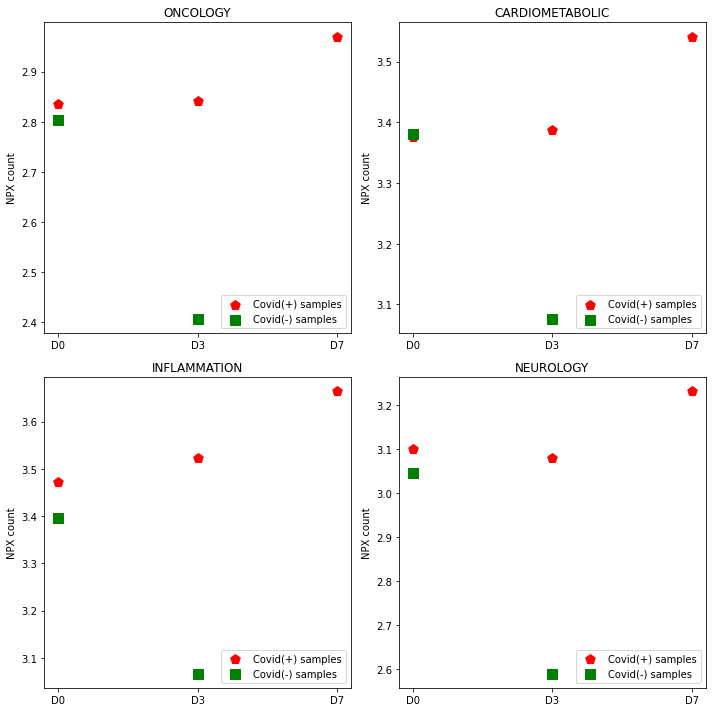

In [159]:
graph_tuple = [(c_k_onco_stats,nc_k_onco_stats),(c_k_card_stats,nc_k_card_stats),(c_k_infl_stats,nc_k_infl_stats),(c_k_neur_stats,nc_k_neur_stats)]
name_dict={0:'ONCOLOGY',1:'CARDIOMETABOLIC',2:'INFLAMMATION',3:'NEUROLOGY'}
fig,axs = plt.subplots(2,2,figsize = (10,10))
for i,ax in enumerate(axs.flatten()):
    x = graph_tuple[i][0].index
    y = graph_tuple[i][0]['mean']
    ax.scatter(x,y,marker = 'p',s=100,c ='red',label='Covid(+) samples')
    x = graph_tuple[i][1].index
    y = graph_tuple[i][1]['mean']
    ax.scatter(x,y,marker = 's',s=100,c ='green',label='Covid(-) samples')
    ax.set_title("{}".format(name_dict[i]))
    ax.legend(loc = 4)
    ax.set_ylabel('NPX count')
fig.tight_layout()



# Plotting Covid+IMMUNO Group vs Non-Covid+IMMUNO Group

c_i_onco_stats    vs  nc_i_onco_stats

c_i_card_stats     vs  nc_i_card_stats

c_i_infl_stats     vs  nc_i_infl_stats

c_i_neur_stats     vs  nc_i_neur_stats     

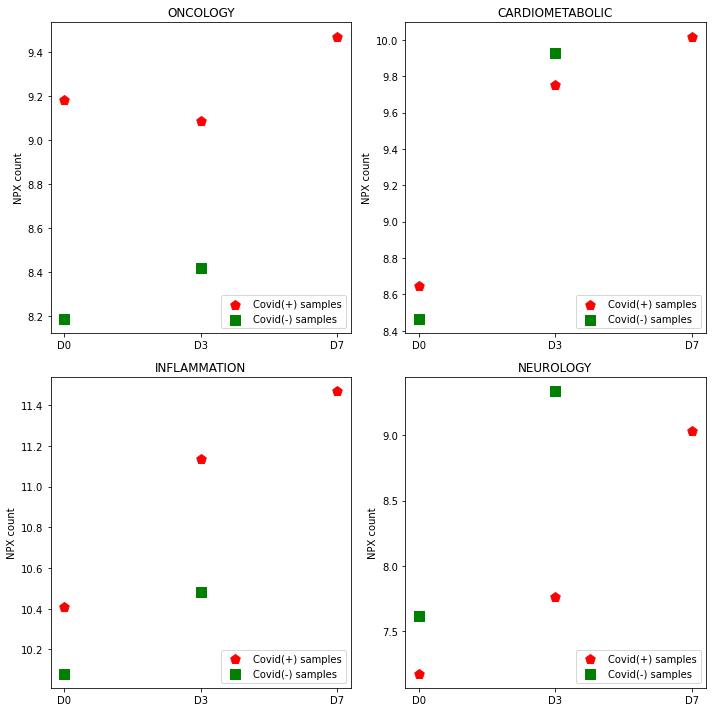

In [308]:
graph_tuple = [(c_i_onco_stats,nc_i_onco_stats),(c_i_card_stats,nc_i_card_stats),(c_i_infl_stats,nc_i_infl_stats),(c_i_neur_stats,nc_i_neur_stats)]
name_dict={0:'ONCOLOGY',1:'CARDIOMETABOLIC',2:'INFLAMMATION',3:'NEUROLOGY'}
fig,axs = plt.subplots(2,2,figsize = (10,10))
for i,ax in enumerate(axs.flatten()):
    x = graph_tuple[i][0].index
    y = graph_tuple[i][0]['max']
    ax.scatter(x,y,marker = 'p',s=100,c ='red',label='Covid(+) samples')
    x = graph_tuple[i][1].index
    y = graph_tuple[i][1]['max']
    ax.scatter(x,y,marker = 's',s=100,c ='green',label='Covid(-) samples')
    ax.set_title("{}".format(name_dict[i]))
    ax.legend(loc = 4)
    ax.set_ylabel('NPX count')
fig.tight_layout()



# Plotting Covid+Lung Group vs Non-Covid+Lung Group

c_l_onco_stats    vs  nc_l_onco_stats

c_l_card_stats    vs  nc_l_card_stats

c_l_infl_stats    vs  nc_l_infl_stats

c_l_neur_stats    vs  nc_l_neur_stats     

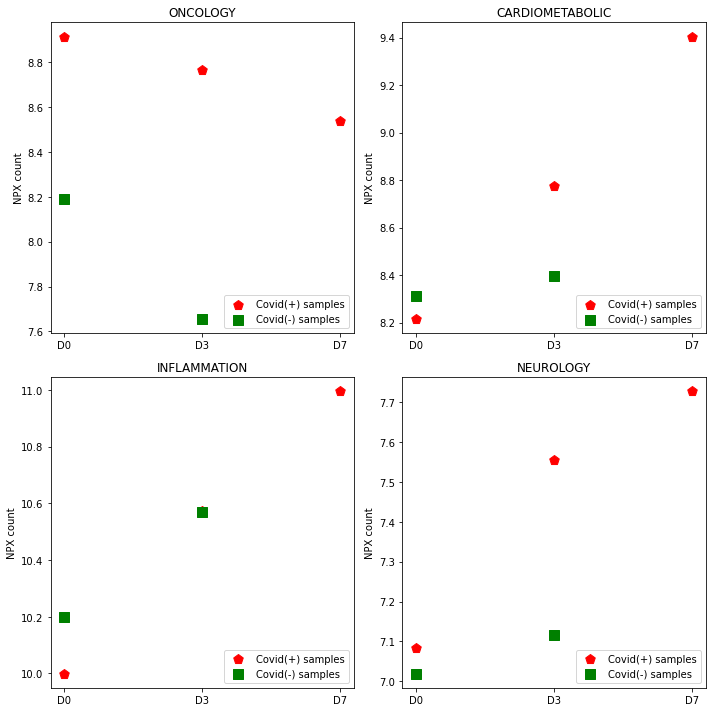

In [307]:
graph_tuple = [(c_l_onco_stats,nc_l_onco_stats),(c_l_card_stats,nc_l_card_stats),(c_l_infl_stats,nc_l_infl_stats),(c_l_neur_stats,nc_l_neur_stats)]
name_dict={0:'ONCOLOGY',1:'CARDIOMETABOLIC',2:'INFLAMMATION',3:'NEUROLOGY'}
fig,axs = plt.subplots(2,2,figsize = (10,10))
for i,ax in enumerate(axs.flatten()):
    x = graph_tuple[i][0].index
    y = graph_tuple[i][0]['max']
    ax.scatter(x,y,marker = 'p',s=100,c ='red',label='Covid(+) samples')
    x = graph_tuple[i][1].index
    y = graph_tuple[i][1]['max']
    ax.scatter(x,y,marker = 's',s=100,c ='green',label='Covid(-) samples')
    ax.set_title("{}".format(name_dict[i]))
    ax.legend(loc = 4)
    ax.set_ylabel('NPX count')
fig.tight_layout()



# Plotting Covid+Heart vs Covid+Lung vs Covid+Kidney vs Covid+Diabetes vs Covid+HTN vs Covid+Immuno

c_h_onco_stats    vs  c_l_onco_stats vs  c_k_onco_stats vs  c_d_onco_stats vs  c_ht_onco_stats vs c_i_onco_stats

(c_h_onco_stats,c_l_onco_stats,c_k_onco_stats,c_d_onco_stats,c_ht_onco_stats,c_i_onco_stats)


c_h_card_stats    vs  c_l_card_stats vs  c_k_card_stats vs  c_d_card_stats vs  c_ht_card_stats vs c_i_card_stats

(c_h_card_stats,c_l_card_stats,c_k_card_stats,c_d_card_stats,c_ht_card_stats,c_i_card_stats)


c_h_infl_stats    vs  c_l_infl_stats vs  c_k_infl_stats vs  c_d_infl_stats vs  c_ht_infl_stats vs c_i_infl_stats

(c_h_infl_stats,c_l_infl_stats,c_k_infl_stats,c_d_infl_stats,c_ht_infl_stats,c_i_infl_stats)


c_h_neur_stats    vs  c_l_neur_stats vs  c_k_neur_stats vs  c_d_neur_stats vs  c_ht_neur_stats vs c_i_neur_stats 

(c_h_neur_stats,c_l_neur_stats,c_k_neur_stats,c_d_neur_stats,c_ht_neur_stats,c_i_neur_stats)           

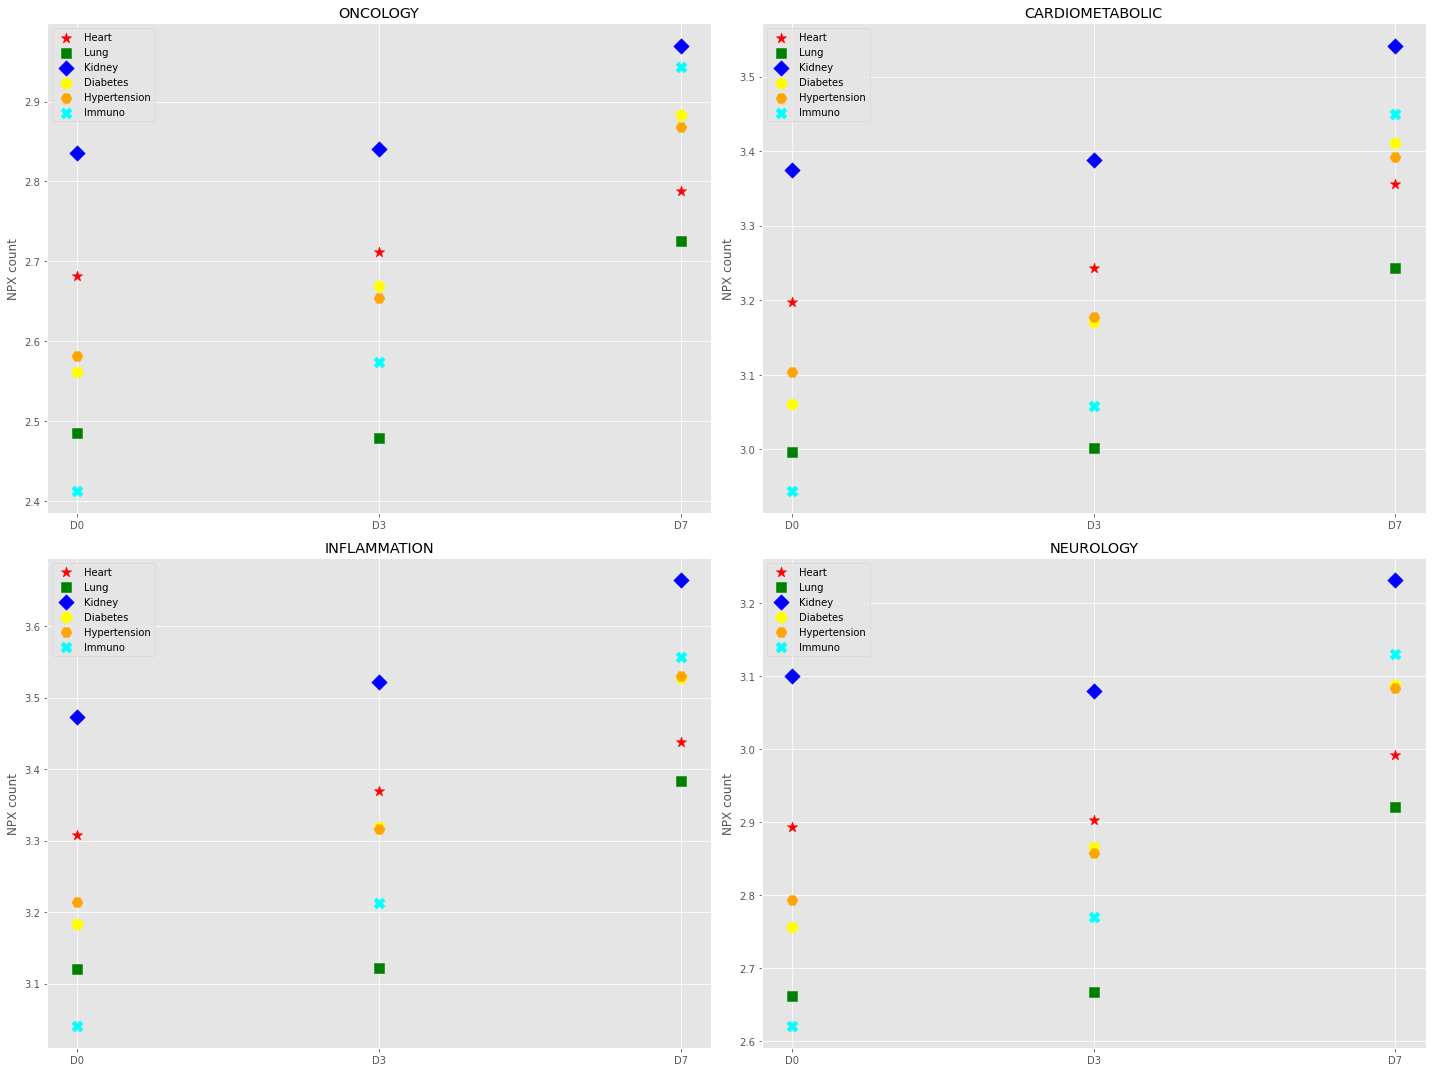

In [420]:

graph_tuple = [(c_h_onco_stats,c_l_onco_stats,c_k_onco_stats,c_d_onco_stats,c_ht_onco_stats,c_i_onco_stats),(c_h_card_stats,c_l_card_stats,c_k_card_stats,c_d_card_stats,c_ht_card_stats,c_i_card_stats),(c_h_infl_stats,c_l_infl_stats,c_k_infl_stats,c_d_infl_stats,c_ht_infl_stats,c_i_infl_stats),(c_h_neur_stats,c_l_neur_stats,c_k_neur_stats,c_d_neur_stats,c_ht_neur_stats,c_i_neur_stats)]

name_dict={0:'ONCOLOGY',1:'CARDIOMETABOLIC',2:'INFLAMMATION',3:'NEUROLOGY'}
disease_dict={0:'Heart',1:'Lung',2:'Kidney',3:'Diabetes',4:'Hypertension',5:'Immuno'}
shape_dict={0:'*',1:'s',2:'D',3:'o',4:'H',5:'X'}
color_dict={0:'red',1:'green',2:'blue',3:'yellow',4:'orange',5:'cyan'}

fig,axs = plt.subplots(2,2,figsize = (20,15))
for i,ax in enumerate(axs.flatten()):
    for j,each in enumerate(graph_tuple[i]):  
        x = each.index
        y = each['mean']
        ax.scatter(x,y,marker = shape_dict[j],s=120,c =color_dict[j],label=disease_dict[j])
    ax.set_title("{}".format(name_dict[i]))
    ax.legend(loc = 2)
    ax.set_ylabel('NPX count')
fig.tight_layout()



In [107]:
graph_tuple = [(c_h_onco_stats,c_l_onco_stats,c_k_onco_stats,c_d_onco_stats,c_ht_onco_stats,c_i_onco_stats),(c_h_card_stats,c_l_card_stats,c_k_card_stats,c_d_card_stats,c_ht_card_stats,c_i_card_stats),(c_h_infl_stats,c_l_infl_stats,c_k_infl_stats,c_d_infl_stats,c_ht_infl_stats,c_i_infl_stats),(c_h_neur_stats,c_l_neur_stats,c_k_neur_stats,c_d_neur_stats,c_ht_neur_stats,c_i_neur_stats)]


In [114]:
for j,each in enumerate(graph_tuple[0]):
    print(each)
    print(j)

           count      mean       std       min       25%       50%       75%  \
Timepoint                                                                      
D0         368.0  2.681669  1.764179 -1.241483  1.299769  2.429011  4.025207   
D3         368.0  2.712116  1.781707 -1.188359  1.328109  2.454672  4.031037   
D7         368.0  2.788364  1.834853 -1.198995  1.393797  2.563737  4.146743   

                max  
Timepoint            
D0         8.942860  
D3         8.647147  
D7         8.602889  
0
           count      mean       std       min       25%       50%       75%  \
Timepoint                                                                      
D0         368.0  2.485453  1.677853 -1.193698  1.172850  2.267983  3.691316   
D3         368.0  2.478819  1.715522 -1.224698  1.135339  2.250935  3.701931   
D7         368.0  2.725165  1.780862 -1.052695  1.344118  2.523318  4.059422   

                max  
Timepoint            
D0         8.914066  
D3         8.764850 

In [47]:
oncology1.head(3) # covid and lung disease

,Timepoint,Assay,NPX
0,D0,AARSD1,4.138273
1,D0,ABL1,3.201590
2,D0,ACAA1,3.436538


In [48]:
oncology2.head(3) # covide and kidney

,Timepoint,Assay,NPX
0,D0,AARSD1,3.505135
1,D0,ABL1,2.833538
2,D0,ACAA1,3.356443


In [49]:
oncology3.head(3) # covid and diabe

,Timepoint,Assay,NPX
0,D0,AARSD1,4.156283
1,D0,ABL1,3.515376
2,D0,ACAA1,3.586856


In [50]:
oncology1.rename(columns={'NPX' : 'Heart_NPX'},inplace = True)

In [57]:
on12 = oncology1.merge(oncology2, on = ['Timepoint','Assay'])

In [60]:
on12.rename(columns={'NPX': 'Lung_NPX'},inplace =True)
on13 = on12.merge(oncology3, on = ['Timepoint','Assay'])
on13.rename(columns={'NPX': 'Kidney_NPX'},inplace =True)
on14 = on13.merge(oncology4, on = ['Timepoint','Assay'])
on14.rename(columns={'NPX': 'diabetes_NPX'},inplace =True)
on15 = on14.merge(oncology5, on = ['Timepoint','Assay'])
on15.rename(columns={'NPX': 'HTN_NPX'},inplace =True)
on16 = on15.merge(oncology6, on = ['Timepoint','Assay'])
on16.rename(columns={'NPX': 'IMMUNO_NPX'},inplace =True)

In [75]:
on16

,Timepoint,Assay,Heart_NPX,Lung_NPX,Kidney_NPX,diabetes_NPX,HTN_NPX,IMMUNO_NPX
0,D0,AARSD1,4.138273,3.505135,4.156283,3.610975,3.721434,3.564952
1,D0,ABL1,3.201590,2.833538,3.515376,2.908862,2.957999,2.653360
2,D0,ACAA1,3.436538,3.356443,3.586856,3.665261,3.536001,3.712696
3,D0,ACP6,3.937785,3.851443,4.302237,3.958935,4.032587,3.890708
4,D0,ADAMTS15,4.111373,3.830637,4.418341,3.778873,3.883913,3.558720
...,...,...,...,...,...,...,...,...
1099,D7,WISP1,4.435889,4.040136,4.874259,4.410386,4.378140,4.224107
1100,D7,XCL1,3.264184,3.249327,3.745850,3.604312,3.448427,3.504900
1101,D7,XPNPEP2,2.244679,2.345205,2.106627,2.565898,2.532986,2.287053
1102,D7,YES1,4.200663,4.609895,4.685995,4.980344,5.037379,5.255380


In [116]:
import matplotlib.pyplot as plt


In [115]:
k= on16[on16['Assay']=='AARSD1']
k.index = k['Timepoint']
k

,Timepoint,Assay,Heart_NPX,Lung_NPX,Kidney_NPX,diabetes_NPX,HTN_NPX,IMMUNO_NPX
Timepoint,,,,,,,,
D0,D0,AARSD1,4.138273,3.505135,4.156283,3.610975,3.721434,3.564952
D3,D3,AARSD1,3.262887,3.355335,3.480967,3.177016,3.207128,3.324400
D7,D7,AARSD1,3.324021,3.388441,3.457018,3.443981,3.467592,3.705680


(0.0, 5.0)

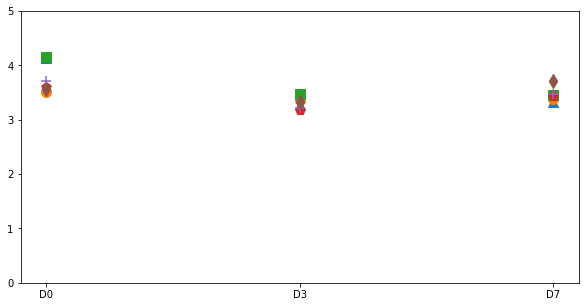

In [143]:
fig,axs = plt.subplots(figsize = (10,5))
x = k['Timepoint']
y = k['Heart_NPX']
axs.scatter(x,y,marker = '^',s=100)
x = k['Timepoint']
y = k['Lung_NPX']
axs.scatter(x,y,marker = 'o',s=100)
x = k['Timepoint']
y = k['Kidney_NPX']
axs.scatter(x,y,marker = 's',s=100)
x = k['Timepoint']
y = k['diabetes_NPX']
axs.scatter(x,y,marker = 'p',s=100)
x = k['Timepoint']
y = k['HTN_NPX']
axs.scatter(x,y,marker = '+',s=100)
x = k['Timepoint']
y = k['IMMUNO_NPX']
axs.scatter(x,y,marker = 'd',s=100)

axs.set_ylim(0,5)

In [ ]:
fig,axs = plt.subplots(figsize = (10,5))
color_dict = {1:"red",2:"yellow",3:"purple",4:"blue",5:"green"}
print()
for i in list(Age_mean.index):
    y= Age_mean.iloc[i-1,:].values
    x= Age_mean.columns 
    cl = color_dict[i]
    axs.scatter(x,y,c= cl,label = 'age: {}'.format(age_dict[i]))


# str = 'age: {}'.format(age_dict[i+1])
axs.set_title('Severity mean of Age group')
plt.legend(loc='lower right')
axs.set_ylim(2,6)
#fig.tight_layout()

In [74]:
t.get_group('D0').T

,0,1,2,3,4,5,6,7,8,9,...,358,359,360,361,362,363,364,365,366,367
Timepoint,D0,D0,D0,D0,D0,D0,D0,D0,D0,D0,...,D0,D0,D0,D0,D0,D0,D0,D0,D0,D0
Assay,AARSD1,ABL1,ACAA1,ACP6,ADAMTS15,ADAMTS8,ADCYAP1R1,ADGRG1,ADM,AGR3,...,VTCN1,VWA1,WFDC12,WFDC2,WIF1,WISP1,XCL1,XPNPEP2,YES1,ZBTB16
Heart_NPX,4.13827,3.20159,3.43654,3.93779,4.11137,3.01011,0.821902,4.04372,7.56126,0.750675,...,0.209177,4.65139,1.98533,5.15213,5.07101,3.90742,2.62002,2.53709,3.8208,1.94557
Lung_NPX,3.50514,2.83354,3.35644,3.85144,3.83064,2.84405,0.816069,3.31946,6.8569,0.836569,...,0.163806,4.55975,1.59251,4.39328,4.84796,3.44246,2.52725,3.0287,3.75293,1.83933
Kidney_NPX,4.15628,3.51538,3.58686,4.30224,4.41834,3.17074,0.861312,4.28352,8.13283,1.02319,...,0.161466,4.85732,2.69739,5.97888,5.19238,4.26917,2.86118,2.52437,3.76467,1.96657
diabetes_NPX,3.61098,2.90886,3.66526,3.95894,3.77887,2.97137,0.860627,3.73456,6.82042,1.0291,...,0.156672,5.00985,1.47856,4.46379,4.85834,3.59102,2.50069,3.06816,3.69323,1.9143
HTN_NPX,3.72143,2.958,3.536,4.03259,3.88391,3.00336,0.831275,3.77216,7.15528,0.882601,...,0.246421,4.87875,1.73847,4.82423,4.88865,3.6886,2.57545,2.85812,3.59734,1.85298
IMMUNO_NPX,3.56495,2.65336,3.7127,3.89071,3.55872,2.90623,0.818548,3.55747,6.73799,0.72228,...,0.156452,4.82776,0.880372,4.31318,4.76409,3.46444,2.53605,2.8469,3.24011,1.52488


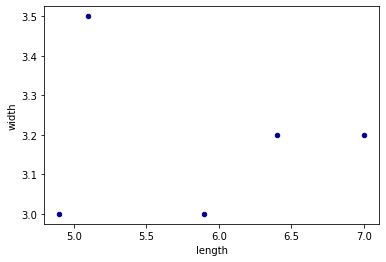

In [62]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                   [6.4, 3.2, 1], [5.9, 3.0, 2]],
                  columns=['length', 'width', 'species'])
ax1 = df.plot.scatter(x='length',
                      y='width',
                      c='DarkBlue')

In [63]:
df

,length,width,species
0,5.1,3.5,0
1,4.9,3.0,0
2,7.0,3.2,1
3,6.4,3.2,1
4,5.9,3.0,2
